<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Projeto_Estudo_Titanic_Insights_Classificadores_do_Aprendizado_Estatistico_App_Novos_Passageiros/blob/main/PROJETO_Final_Estudo_Titanic_Wagner_Lopes_Cardozo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

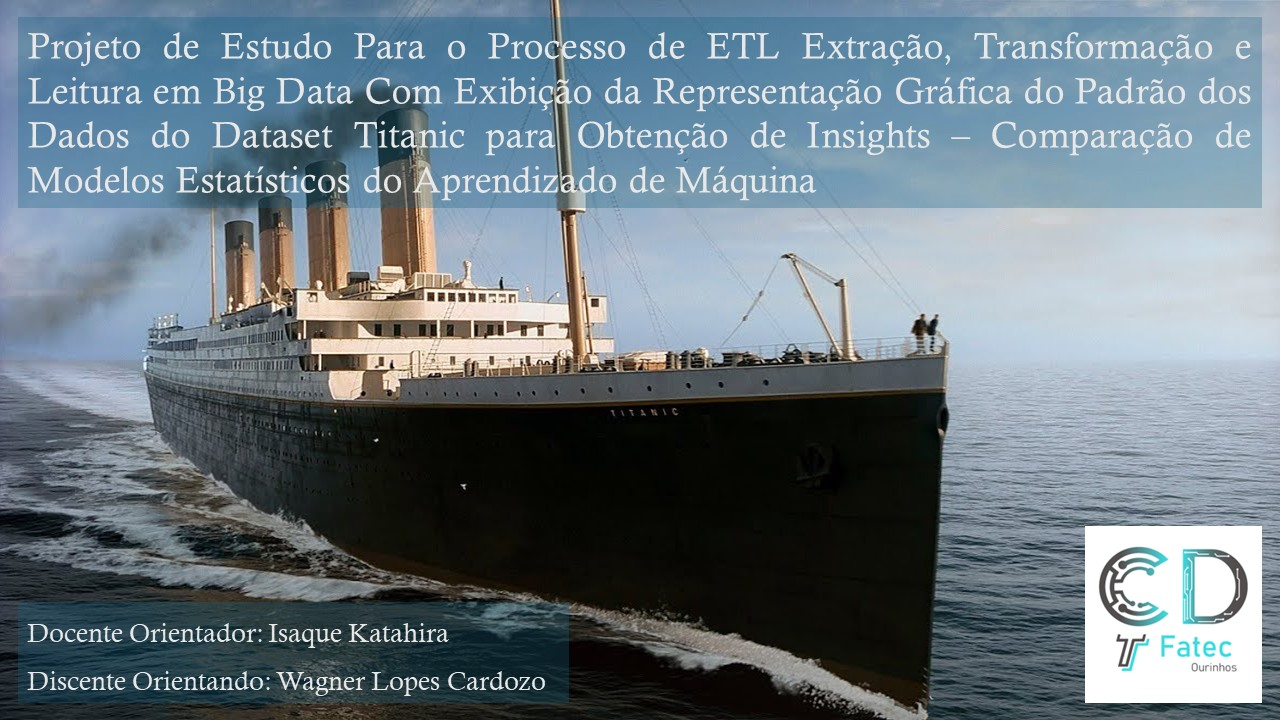

#Introdução e Motivação do Estudo de Caso Titanic

##Você foi contratado por uma empresa de consultoria para realizar uma análise preditiva sobre a sobrevivência dos passageiros do Titanic. Utilize o dataset "Titanic: Machine Learning from Disaster" disponível no Kaggle para realizar as seguintes tarefas:

* Carregue e explore os dados do Titanic.

* Limpe e prepare os dados para análise, tratando valores ausentes, removendo duplicatas e convertendo variáveis categóricas em numéricas, se necessário.

* Realize análises exploratórias e visualizações para entender a distribuição das variáveis e a relação entre elas e a sobrevivência dos passageiros.

* Divida o conjunto de dados em features (X) e target (y).

* Divida o conjunto de dados em conjuntos de treino e teste.

* Aplique um modelo de classificação simples, como Regressão Logística, para prever a sobrevivência dos passageiros.

* Avalie a acurácia do modelo e interprete os resultados.

##Dicas:

* Utilize as bibliotecas pandas, matplotlib, seaborn e scikit-learn para realizar as análises e implementar o modelo de machine learning.

* Ao realizar as análises exploratórias, explore diferentes variáveis, como idade, sexo, classe, etc., e visualize sua relação com a sobrevivência.

* Ao aplicar o modelo de Regressão Logística, experimente ajustar os parâmetros do modelo e avaliar seu desempenho usando métricas como acurácia, matriz de confusão, etc.

* Ao interpretar os resultados, analise a importância das variáveis no modelo e discuta suas descobertas com base nos insights obtidos durante as análises exploratórias.

#<font color=red>**Observação**: Os dois últimos algoritmos deste Projeto de Estudo faz as predições para um único passageiro novo e vários passageiros novos, onde o usuário, escolhe a quantidade de passageiros novos no segundo algoritmo, exibindo na tela na cor vermelha, se os passageiros novos são classificados como sobreviventes ou não, e a precisão da classificação no cor amarela, usando os três melhores classificadores estatísticos do aprendizado de máquina, neste Projeto de Estudo: Random Forest, XGBoost e CatBoost. O usuário informa o nome do passageiro, a idade, o sexo, o local de embarque e a classe do passageiro, e os três modelos de classificadores informam se o passageiro sobrevive ou não, a um possível acidente com o Titanic.

##Exibindo na tela as 5 primeiras linhas do dataset Titanic

In [ ]:
#Importando a biblioteca

import pandas as pd

#Carregando o dataset

df_titanic = pd.read_csv('/content/titanic.csv')

#Mostrando as 5 primeiras linhas do dataset

df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#Sumário dos Dados do Dataset

* PassengerID: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao naufrágio
* 0 = não
* 1 = sim
* PCclass: Classe do bilhete
* 1 = 1ª classe
* 2 = 2ª classe
* 3 = 3ª classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e/ou irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto de embarque
* C = Cherbourg
* Q = Queenstown
* S = Southampton

##Exibindo na tela a quantidade de colunas e linhas do dataset

In [ ]:
#Mostrando a quantidade de colunas e linhas do dataset

print('Colunas:', df_titanic.shape[1])
print('Linhas:', df_titanic.shape[0])

Colunas: 12
Linhas: 891


##Exibindo na tela um número maior de linhas do dataset agora são 10 linhas

In [ ]:
#Mostrando agora as 10 primeiras linha do dataset

df_titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

##Exibindo na tela informações dos dados do dataset tipos de variáveis, linhas e colunas

In [ ]:
#Verificando informações dos dados
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Exibindo na tela as carácterísticaas estatísticas do dados do dataset tais como contagem geral dos dados, média, desvio padrão, menor valor, 1º quartil (25%), 2º quartil (50%), 3º quartil (75%) e maior valor

In [ ]:
#Exibindo a etatística de todas as colunas

print('Na primeira coluna temos: Contagem Total, Média, Desvio Padrão, Valor Mínimo, 1º Quartil, 2º Quartil, 3º Quartil, Valor Máximo')

df_titanic.describe()

Na primeira coluna temos: Contagem Total, Média, Desvio Padrão, Valor Mínimo, 1º Quartil, 2º Quartil, 3º Quartil, Valor Máximo


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

##É necessário tratar os valores ausentes do dataset

In [ ]:
#Tratando os valores auxentes

df_titanic.dropna(inplace=True)

##É necessário verificar se tem valores duplicados

In [ ]:
#Verificando se existe valores duplicados

df_titanic.duplicated().sum()

0

##É sempre bom proceder, para remover valores duplicados, mesmo tendo a informação que não existe valores duplicados

In [ ]:
#Removendo valores duplicados, no caso se houver

df_titanic.drop_duplicates(inplace=True)

##Para mais adiante implementar os modelos estatísticos do aprendizado de máquina é importante converter as variáveis categóricas em variáveis numéricas

In [ ]:
#Convertendo variáveis categóricas em numéricas

df_titanic['sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

##Exibindo na tela de outra forma os dados do dataset usando o comando "print"

In [ ]:
print(df_titanic)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

#Vamos selecionar as features (colunas) de maior relevância para começar as análises

In [ ]:
#Selecionando as features mais relevantes para análise

features = ['Age', 'Sex', 'Pclass', 'Survived']
df_titanic = df_titanic[features]

##Exibindo na tela as informações estatísticas das features mais relevantes balanceadas

In [ ]:
#Exibindo estatísticas descritivas

df_titanic.describe() #Média, desvio padrão, valor mínimo, primeiro quartil 25%, segundo quartil 50%, terceiro quartil 75% e valor máximo

Age      Pclass    Survived
count  183.000000  183.000000  183.000000
mean    35.674426    1.191257    0.672131
std     15.643866    0.515187    0.470725
min      0.920000    1.000000    0.000000
25%     24.000000    1.000000    0.000000
50%     36.000000    1.000000    1.000000
75%     47.500000    1.000000    1.000000
max     80.000000    3.000000    1.000000

##Importando a biblioteca gráfica Seaborn

In [ ]:
import seaborn as sns

##Antes de começar as análises dos dados do dataset Titanic, vamos fazer uma verificação se existe outliers em algumas features idade (age), preço da passagem (fare) e quantidade de cônjugues e/ou irmão a bordo

##É fundamental sabermos identificar a presença de outliers no nosso dataset, dados que se diferenciam muito dos outros, ou seja, são valores que fogem da normalidade. Esses outliers podem influenciar drasticamente uma determinada análise realizada no dataset, causando problemas nos resulados obtidos.

##Graficamente, os outliers podem ser identificados através de histogramas ou usando o boxplot, e é isso que será feito em seguida, iremos usar a representação gráfica boxplot.

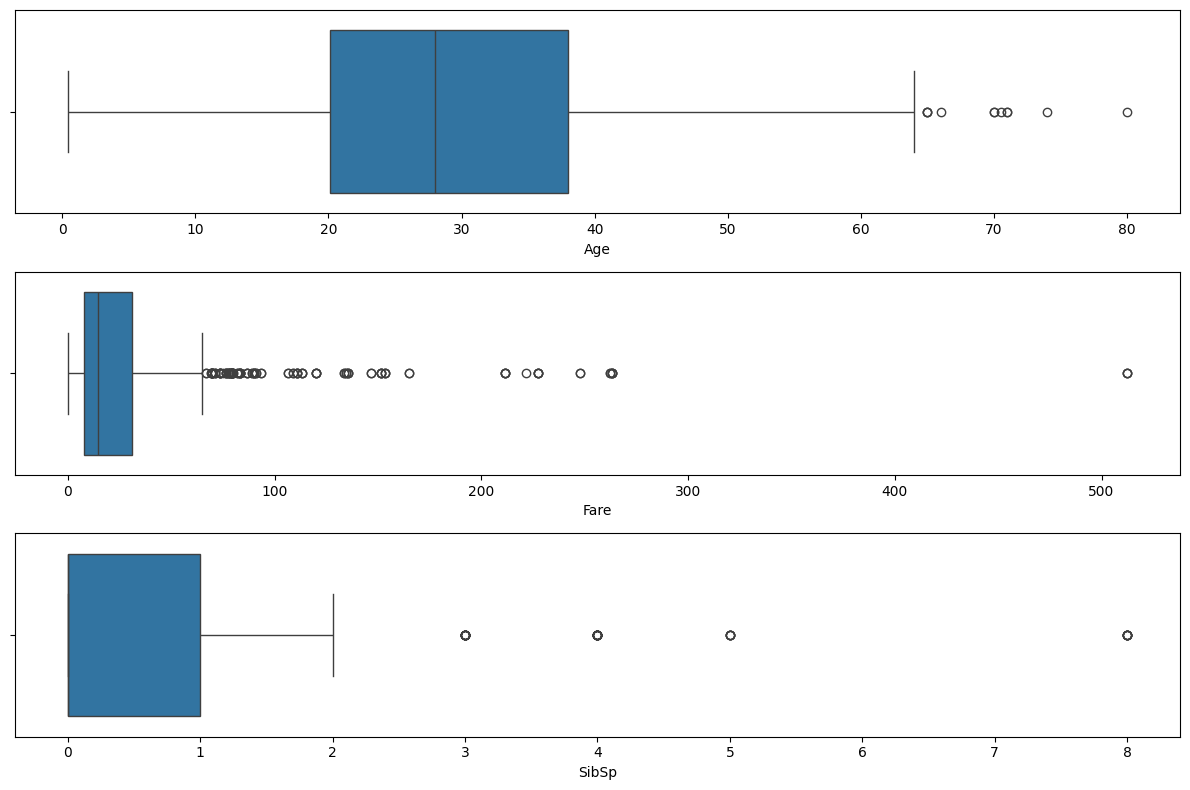

In [ ]:
#Verificando se existe outliers no dataset

fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(12, 8))
sns.boxplot(data=df_titanic, x="Age", ax=axis1)
sns.boxplot(data=df_titanic, x="Fare", ax=axis2)
#sns.boxplot(data=df_titanic, x="Survived", ax=axis3)
#sns.boxplot(data=df_titanic, x="Pclass", ax=axis4)
sns.boxplot(data=df_titanic, x="SibSp", ax=axis3)
#sns.boxplot(data=df_titanic, x="Parch", ax=axis6)

plt.tight_layout()



##Importando a biblioteca MatPlotLib para outras representações gráficas do comportamento numérico dos dados

In [ ]:
#Importando biblioteca para representação gráfica
import matplotlib.pyplot as plt

##Exibindo na tela o histograma da distribuição das idades dos passageiros

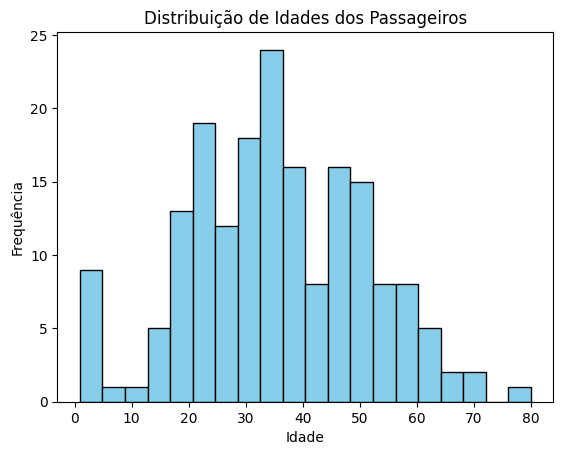

In [ ]:
#Plotando o histograma
plt.hist(df_titanic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()                 #Distribuição das idades

##Podemos perceber pelo histograma que a maioria das idades dos passageiros eram em torno de 35 anos

In [ ]:
#Importando biblioteca para representação gráfica
import seaborn as sns

##Exibindo na tela a representação gráfica da relação de sobrevivência pelo tipo de classe

<function matplotlib.pyplot.show(close=None, block=None)>

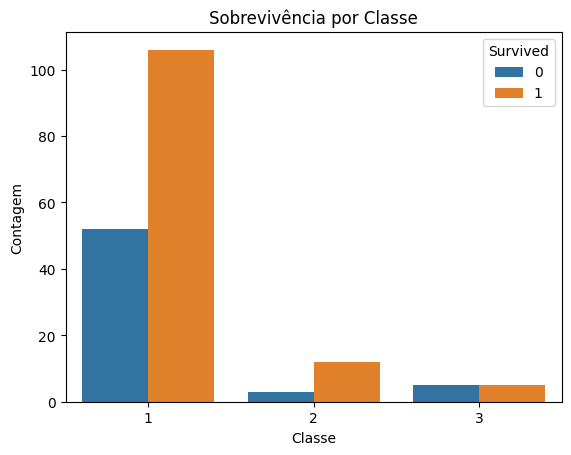

In [ ]:
#Plotando a repressentção gráfica da sobrevivência por classe
sns.countplot(x='Pclass', hue='Survived', data=df_titanic)
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show

##Podemos observar que os passageiros tanto homens ou mulheres da primeira classe tiveram uma sibrsvivência bem maior do que comparado com os passageiros da segunda e terceira classe

#Vamos fazer alguma análises mais detalhadas e com outras representações gráficas

##Após extrairmos algumas informações iniciais do conjunto de dados, podemos partir para questionamentos mais específicos, relacionados diretamente à chance de sobrevivência de um determinado grupo de passageiros, considerando sexo, classe e local de embarque

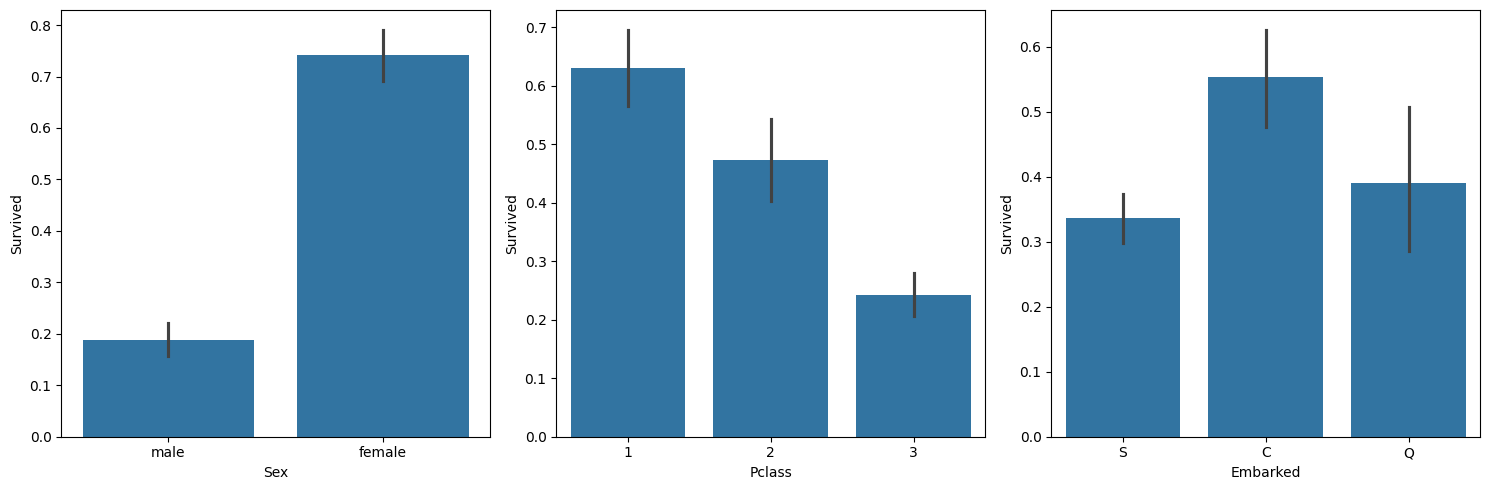

In [ ]:
#Plotando à chance de sobrevivência de um determinado grupo de passageiros, considerando sexo, classe e local de embarque

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = df_titanic, x = 'Sex', y = 'Survived', ax = axis1)

sns.barplot(data = df_titanic, x = 'Pclass', y = 'Survived', ax = axis2)

sns.barplot(data = df_titanic, x = 'Embarked', y = 'Survived', ax = axis3)

plt.tight_layout()

##A partir da análise dos três gráficos acima, podemos extrair duas informações importantes:

* As mulheres têm muito mais chances de sobreviverem do que os homens, enquanto elas possuem cerca de 75% de chances, os homens apresentam cerca de 18%.

* Os passageiros que viajaram na 1ª Classe possuem mais que o dobro de chances de sobreviverem em relação aos que compraram a 3ª Classe, conforme já observado numa outra análise já feita acima.

* Os passageiros que embarcaram a partir da cidade de Cherbourg são os que mais têm chances de sobreviverem, enquanto os que embarcaram em Southampton, possuem as menores chances.

##As probabilidades de sobrevivência das mulheres no desastre do Titanic se estende para todos os casos individuais, para todas as classes de viagem e cidades de embarque, como podemos observar nos gráficos abaixo

<ipython-input-24-ef80f9ceb697>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = df_titanic, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
<ipython-input-24-ef80f9ceb697>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = df_titanic, saturation = .2, kind = "bar", ci = None, aspect = 0.8)


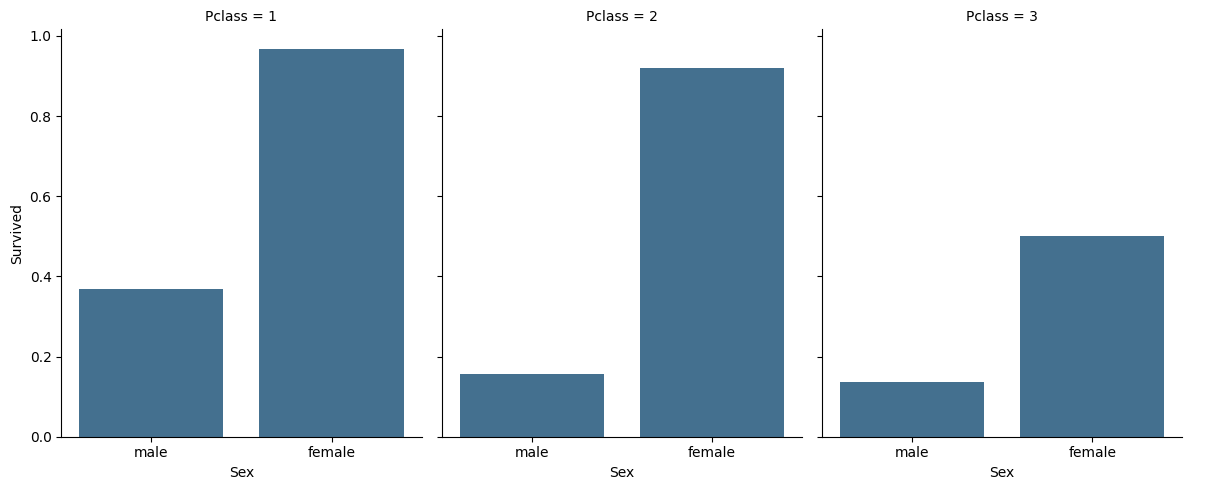

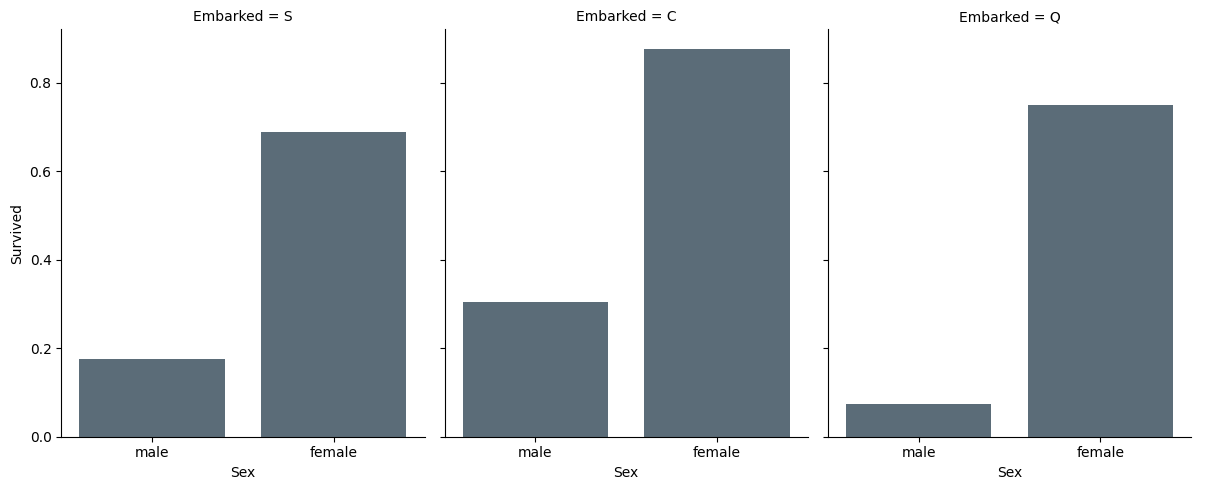

In [ ]:
#Plotando o padrão dos dados para as mulheres em relçaõ aos homens

sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = df_titanic, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = df_titanic, saturation = .5, kind = "bar", ci = None, aspect = 0.8)

plt.tight_layout()

##Também podemos realizar a análise em relação às idades dos passageiros e saber quais tiveram mais chances de sobreviver

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


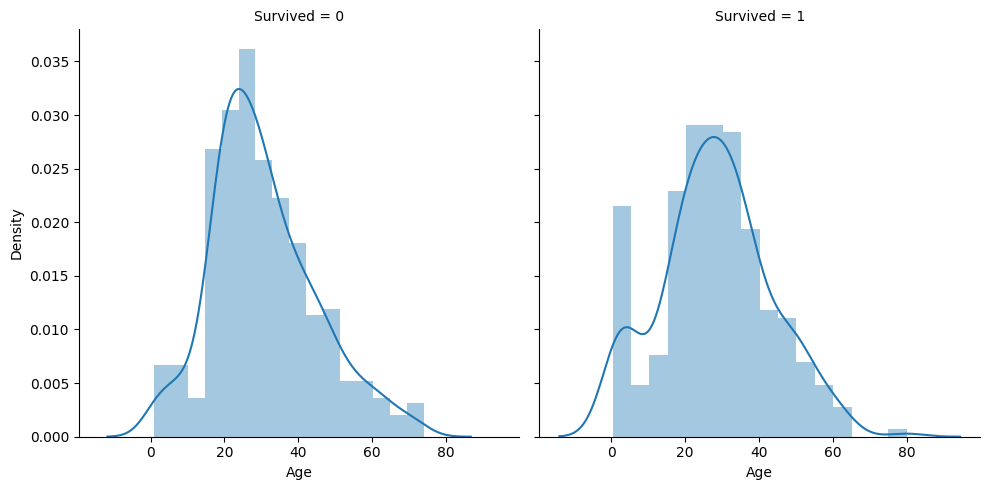

In [ ]:
#Plotando o histograma das idades em relação a sobrevivência ou não

sns.FacetGrid(df_titanic, col = 'Survived', height = 5).map(sns.distplot, 'Age')

plt.tight_layout()

##OS gráficos acima mostram a distribuição de idades para os sobreviventes e mortes no naufrágio do navio Titanic, podemos perceber que a maior parte dos passageiros, nas duas situações, possuem idades entre 20 e 30 anos

##No gráfico da direita (sobreviventes), podemos perceber que há um pico nos passageiros que possuem idade de até 5 anos, mostrando que crianças um pouco menores têm mais chances de sobreviver

#Vamos agora exibir o gráfico de calor para analisar a correlação das variáveis

##Através desse gráfico, podemos entender a correlação entre as variáveis, se é positiva ou negativa

<ipython-input-28-a71a1942ffb8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_titanic.corr(), fmt = '.2g', cmap = 'Purples', annot= True)


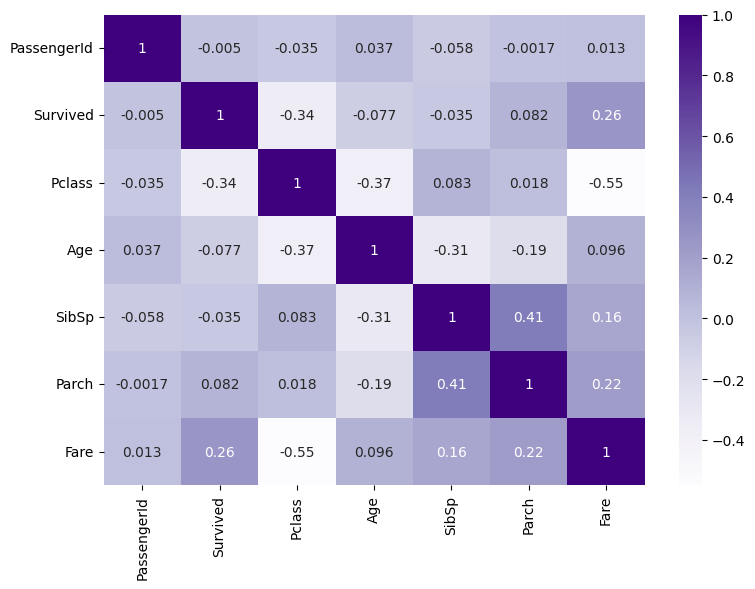

In [ ]:
#Plotando o mapa de calor matriz de correlação entre as features

colormap = sns.diverging_palette(220, 10, as_cmap = True)

fig, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(df_titanic.corr(), fmt = '.2g', cmap = 'Purples', annot= True)
plt.tight_layout()

#Vamos agora criar um algoritmo que solicita por meio de um front end simples ao usuário o arquivo .csv e depois informa as cracterísticas do dataset bem como também informações estatísticas além de exibir na tela outras representaçõs gráfica de possíveis análises para este disastre histórico com o Titanic

##Então temos:

* Estatística descritiva

* Informações gerais

* Contagem de Sobreviventes (0 = Não Sobreviveu, 1 = Sobreviveu)

* Distribuição de Idades dos Passageiros

* Relação entre Classe do Ticket e Sobrevivência

* Distribuição de Sexo dos Passageiros

* Relação entre Sexo e Sobrevivência

* Distribuição de Tarifas Pagas pelos Passageiros

* Relação entre Idade e Tarifa

* Distribuição de Sobrevivência por Idade

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

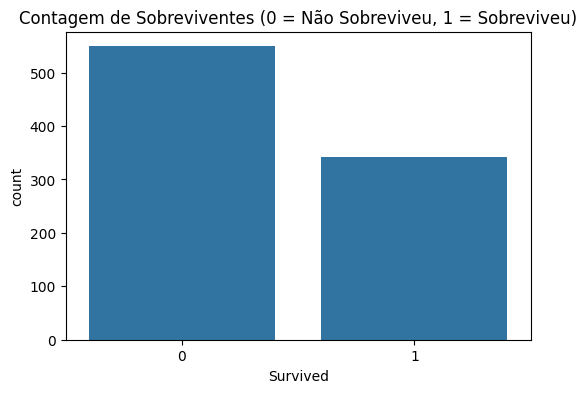

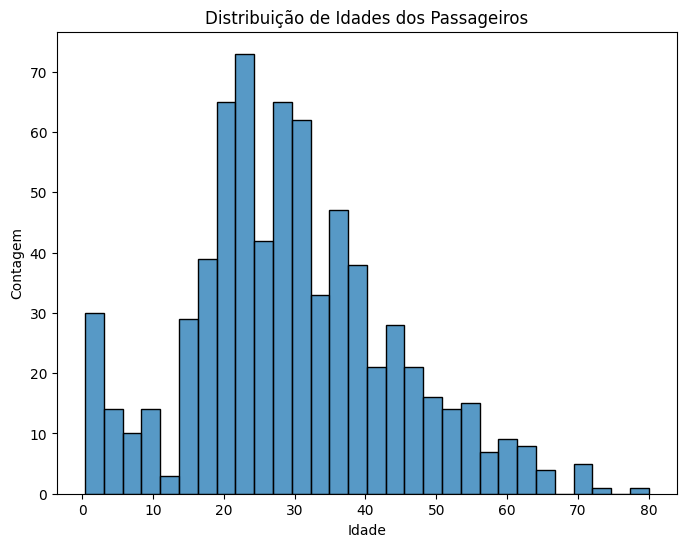

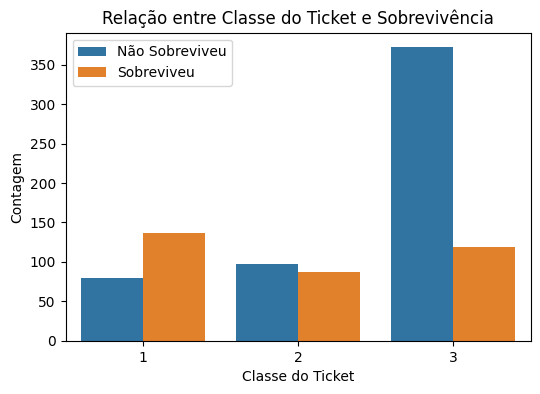

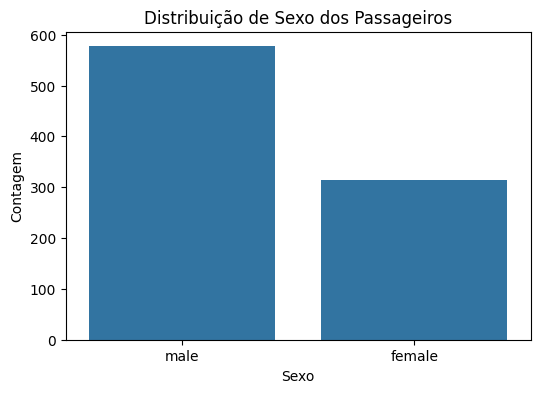

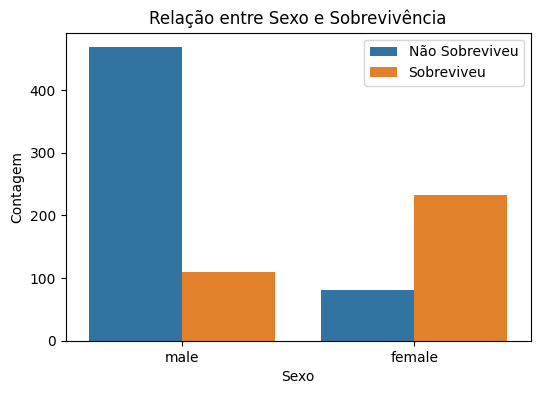

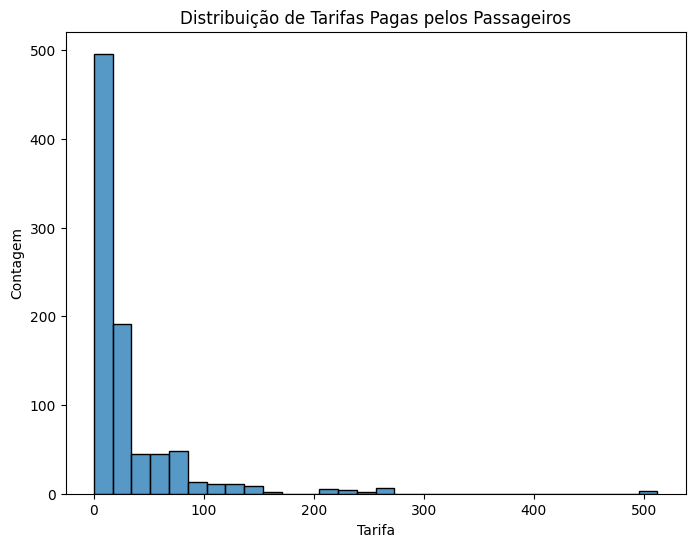

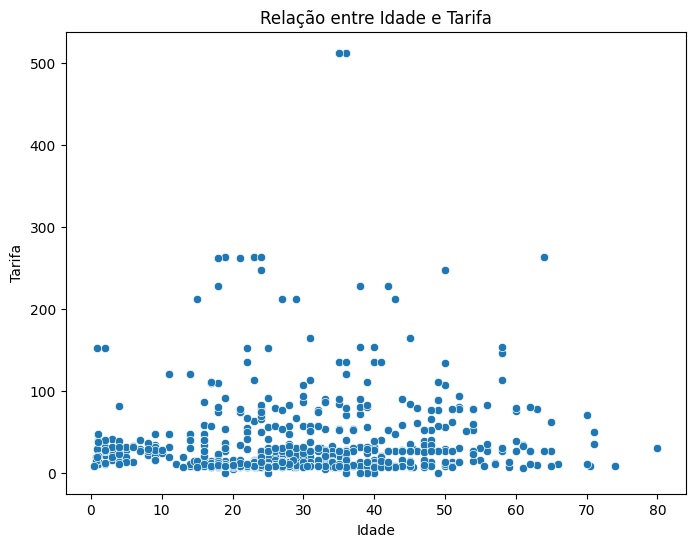

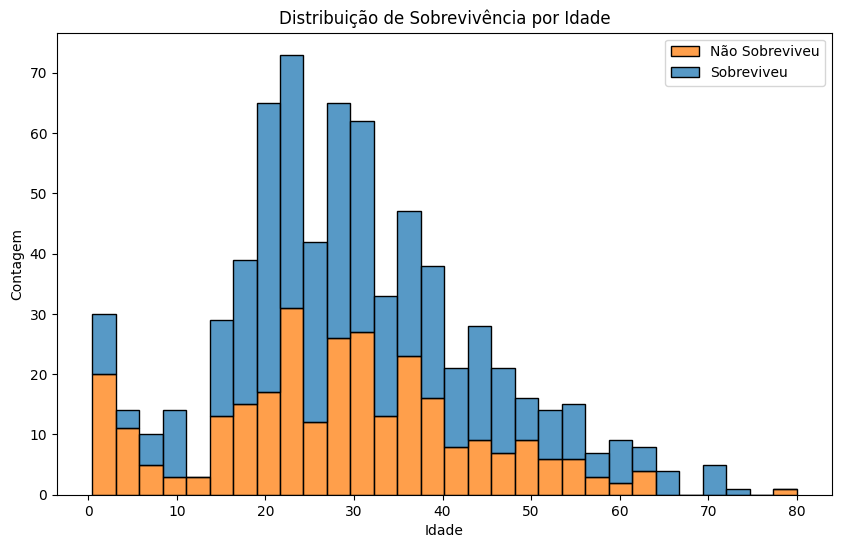

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados
url = "/content/titanic.csv"
df = pd.read_csv(url)

# Visualizar as primeiras linhas do dataframe
print(df.head())

# Informações gerais sobre o dataframe
print(df.info())

# Estatísticas descritivas para variáveis numéricas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Visualização da contagem de sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Contagem de Sobreviventes (0 = Não Sobreviveu, 1 = Sobreviveu)')
plt.show()

# Visualização da distribuição de idades dos passageiros
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# Visualização da relação entre a classe do ticket e a sobrevivência
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Relação entre Classe do Ticket e Sobrevivência')
plt.xlabel('Classe do Ticket')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da distribuição de sexo dos passageiros
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Distribuição de Sexo dos Passageiros')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

# Visualização da relação entre sexo e sobrevivência
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Relação entre Sexo e Sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da distribuição de tarifas
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=30, kde=False)
plt.title('Distribuição de Tarifas Pagas pelos Passageiros')
plt.xlabel('Tarifa')
plt.ylabel('Contagem')
plt.show()

# Visualização da relação entre a idade e a tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Relação entre Idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

# Visualização da distribuição de sobrevivência por idade
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack', bins=30)
plt.title('Distribuição de Sobrevivência por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()


#Continuando a cruzar os dados podemos concluir outros insights bem interessantes e fazer a exibição na tela dos gráficos para estes novos insights

Então temos:

* Distribuição de Sobrevivência por Idade e Sexo

* Distribuição de Tarifas por Classe e Sobrevivência

* Relação entre Tamanho da Família e Sobrevivência

* Relação entre Conhecimento da Cabine e Sobrevivência

* Relação entre Local de Embarque e Sobrevivência

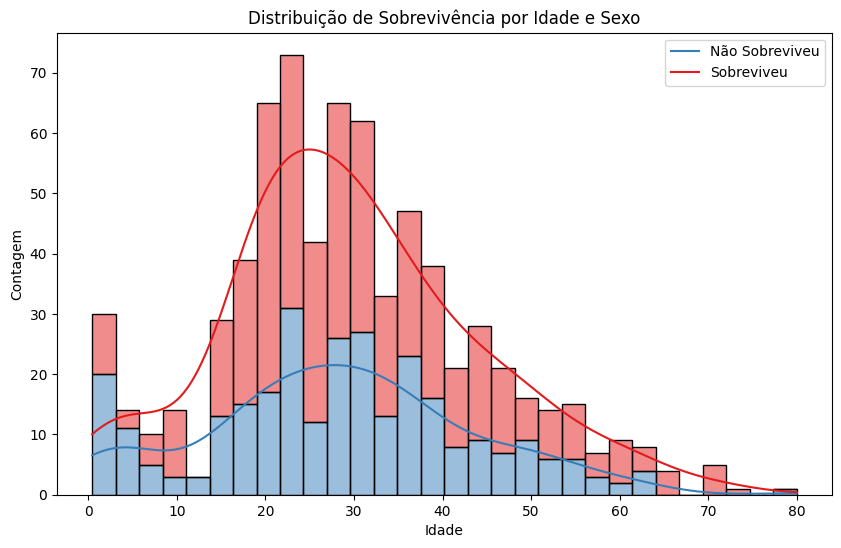

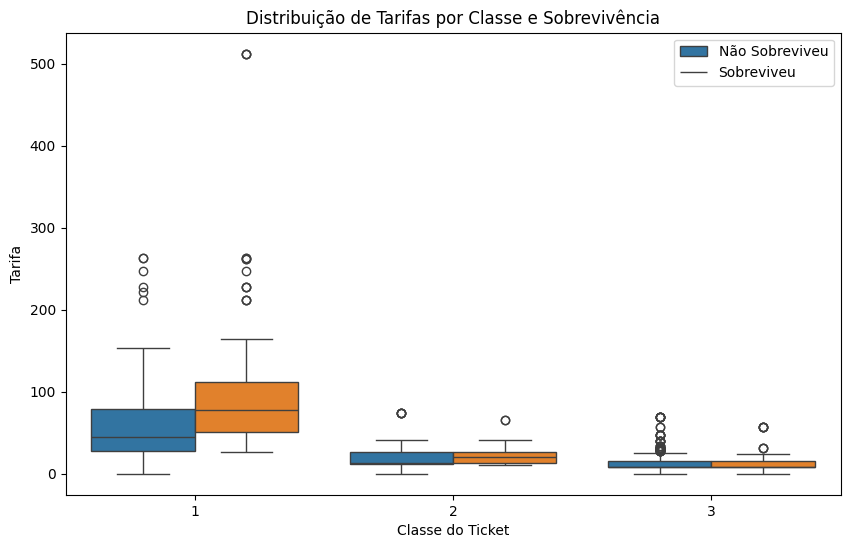

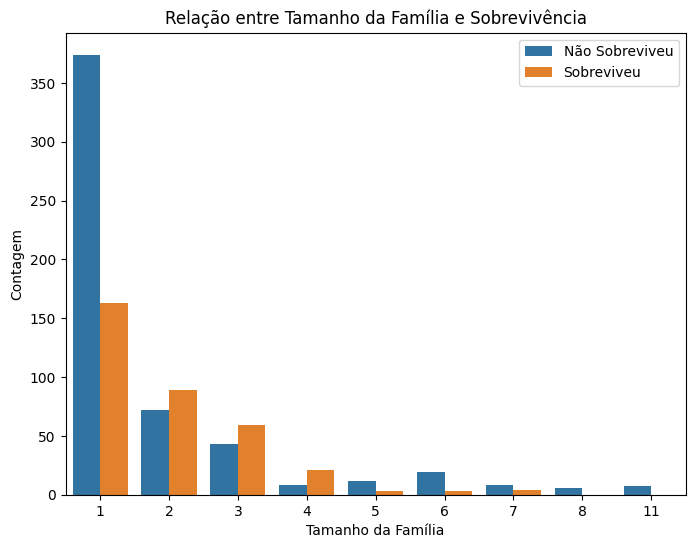

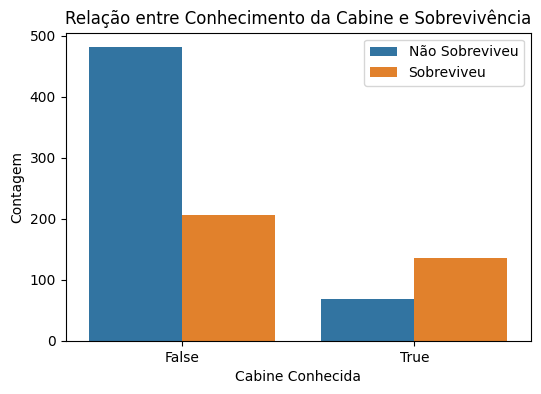

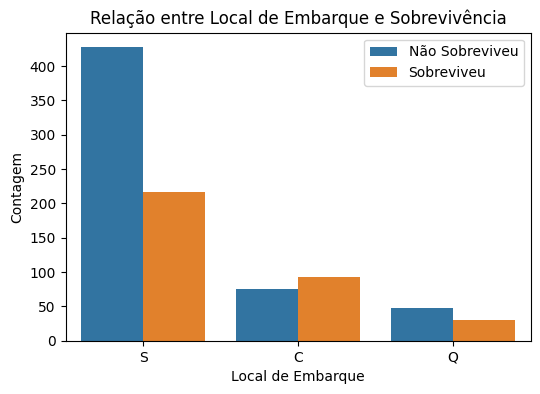

In [ ]:
# Visualização da distribuição de sobrevivência por idade e sexo
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack', bins=30, kde=True, palette='Set1')
plt.title('Distribuição de Sobrevivência por Idade e Sexo')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da distribuição de tarifas por classe e sobrevivência
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Distribuição de Tarifas por Classe e Sobrevivência')
plt.xlabel('Classe do Ticket')
plt.ylabel('Tarifa')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da relação entre a quantidade de parentes a bordo e a sobrevivência
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Relação entre Tamanho da Família e Sobrevivência')
plt.xlabel('Tamanho da Família')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da relação entre a cabine e a sobrevivência (considerando apenas as cabines conhecidas)
df['Cabin_known'] = df['Cabin'].notnull()
plt.figure(figsize=(6, 4))
sns.countplot(x='Cabin_known', hue='Survived', data=df)
plt.title('Relação entre Conhecimento da Cabine e Sobrevivência')
plt.xlabel('Cabine Conhecida')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Visualização da distribuição de sobrevivência por local de embarque
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Relação entre Local de Embarque e Sobrevivência')
plt.xlabel('Local de Embarque')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()


##Das representações gráfica acima, a mais interessante de ser comentada neste Projeto de Estudo é a Relação entre Conhecimento da Cabine e Sobrevivência, onde podemos interpretar que os passageiros que conheciam melhor o trajeto da sua cabine até um ponto de socorro (resgate por meio de botes) tem maior probabilidade de sobrevivência do que os passageiros que não conheciam o trajeto para um ponto de socorro ou mesmo poderiam se perder num senário de tensão pisicológica

##Antes de partirmos para implementação dos algoritmos para os modelos estatísticos do aprendizado de máquina, iremos tentar melhorar algumas representações gráfica dos valores numéricos do dataset exibindo graficamente de outra forma

##Então temos:

* Distribuição de Sobrevivência por Idade, Sexo e Classe

* Correlação entre Variáveis Numéricas

* Distribuição de Idade por Classe e Sexo com Sobrevivência

* Relação entre Tarifa, Idade e Sobrevivência por Classe

* Distribuição de Tarifa por Sexo com Sobrevivência

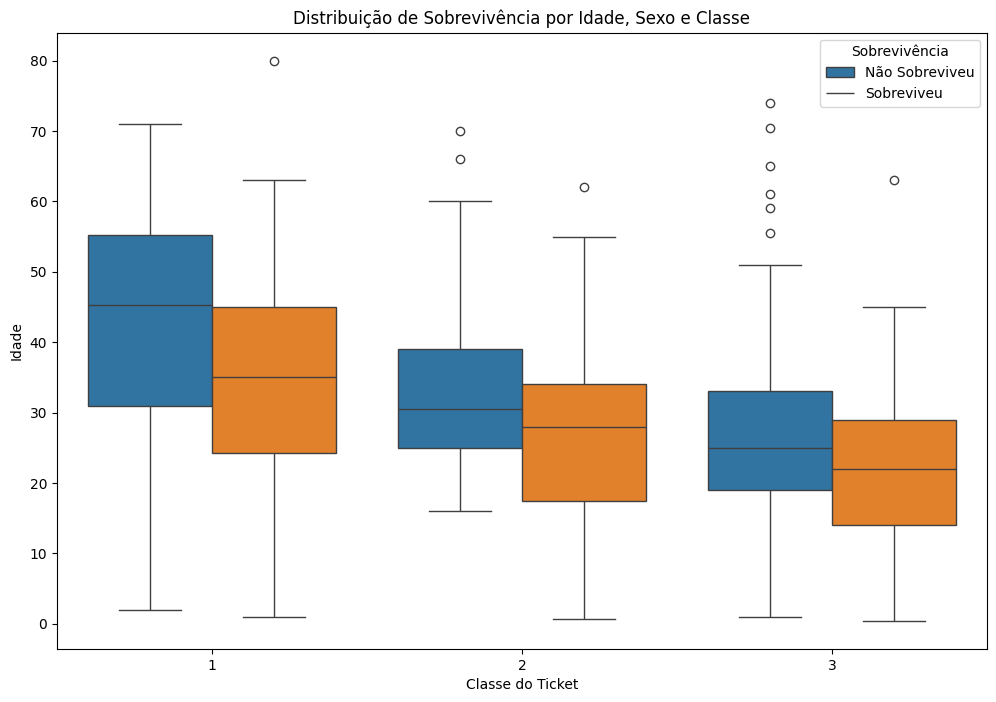

<ipython-input-83-23a2c5f03c51>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



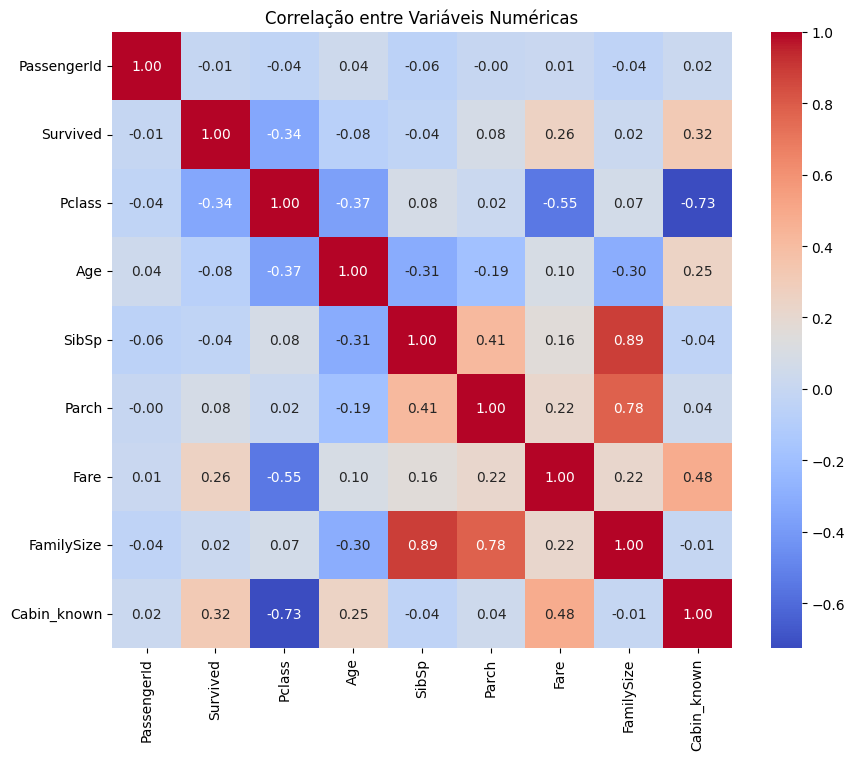

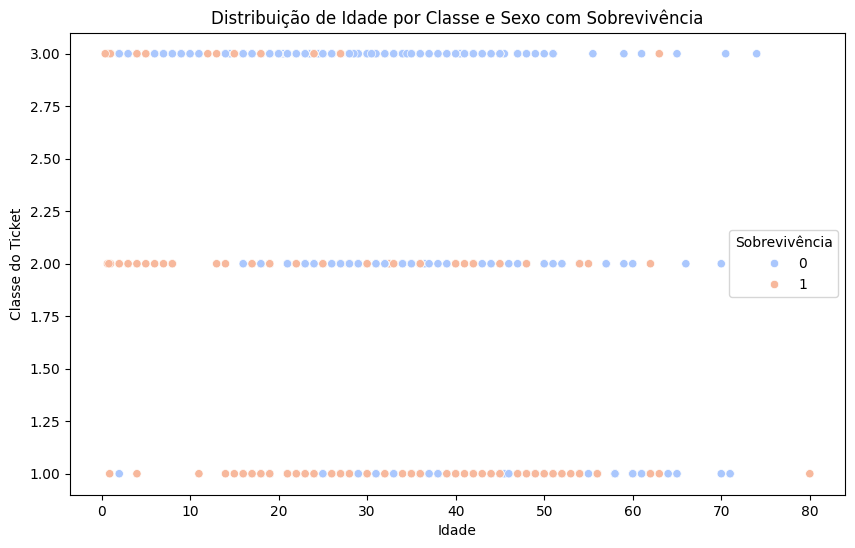

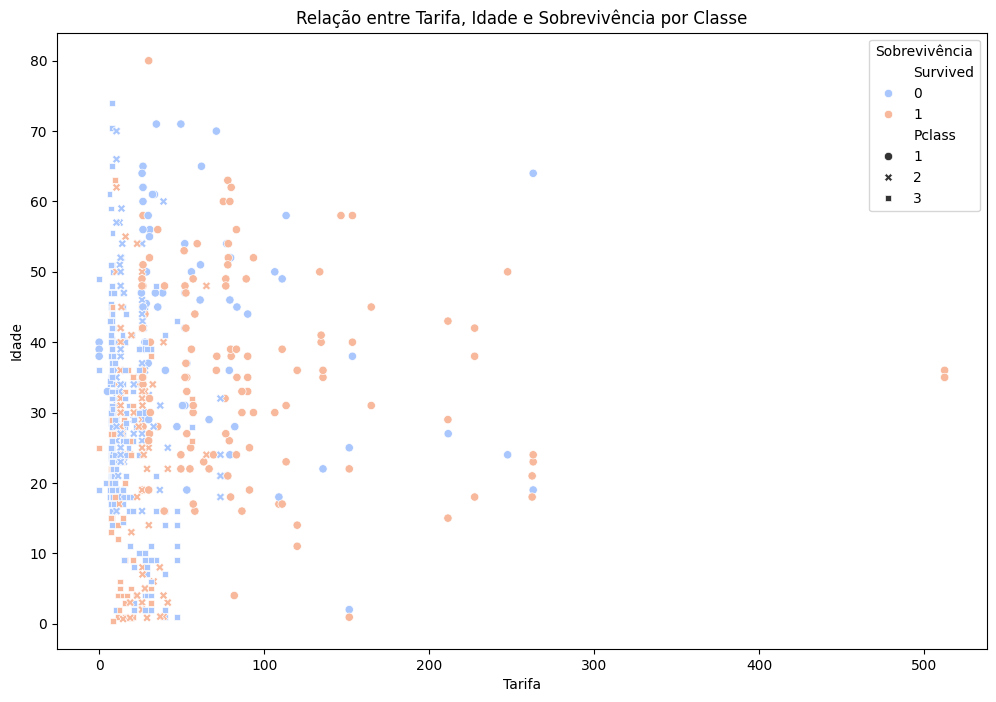

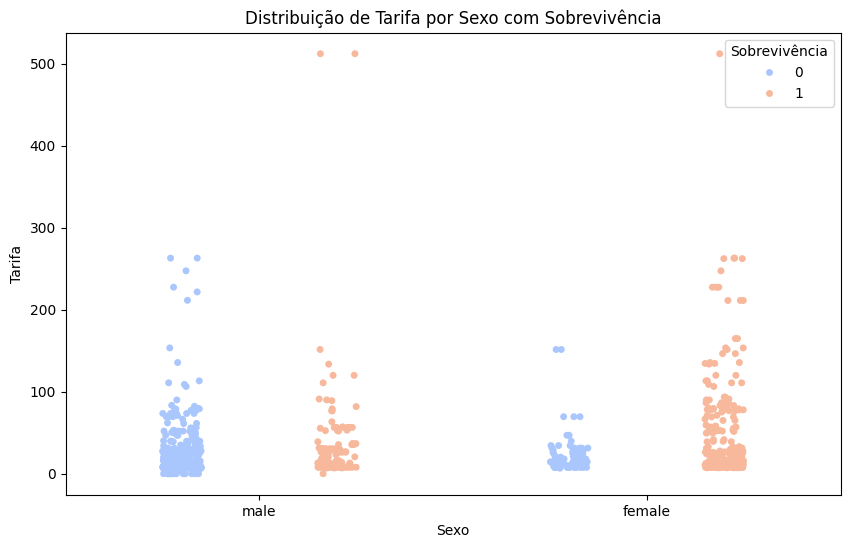

In [ ]:
# Distribuição de sobrevivência por idade, sexo e classe
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Distribuição de Sobrevivência por Idade, Sexo e Classe')
plt.xlabel('Classe do Ticket')
plt.ylabel('Idade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], title='Sobrevivência')
plt.show()

# Correlação entre as variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Visualização da distribuição de idade por sexo e classe com sobrevivência codificada por cor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pclass', hue='Survived', palette='coolwarm', data=df)
plt.title('Distribuição de Idade por Classe e Sexo com Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Classe do Ticket')
plt.legend(title='Sobrevivência')
plt.show()

# Visualização da relação entre tarifa e sobrevivência por classe com distribuição de idade
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fare', y='Age', hue='Survived', style='Pclass', palette='coolwarm', data=df)
plt.title('Relação entre Tarifa, Idade e Sobrevivência por Classe')
plt.xlabel('Tarifa')
plt.ylabel('Idade')
plt.legend(title='Sobrevivência')
plt.show()

# Visualização da distribuição de tarifa por sexo com sobrevivência codificada por cor
plt.figure(figsize=(10, 6))
sns.stripplot(x='Sex', y='Fare', hue='Survived', palette='coolwarm', data=df, dodge=True)
plt.title('Distribuição de Tarifa por Sexo com Sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Tarifa')
plt.legend(title='Sobrevivência')
plt.show()


##Tentando melhorar o gráfico de calor (matriz de correlação) que exibe a relaçao entre as variáveis (features), mostrando as correlações positivas e negativas

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic.csv


<ipython-input-1-593a642fb32e>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


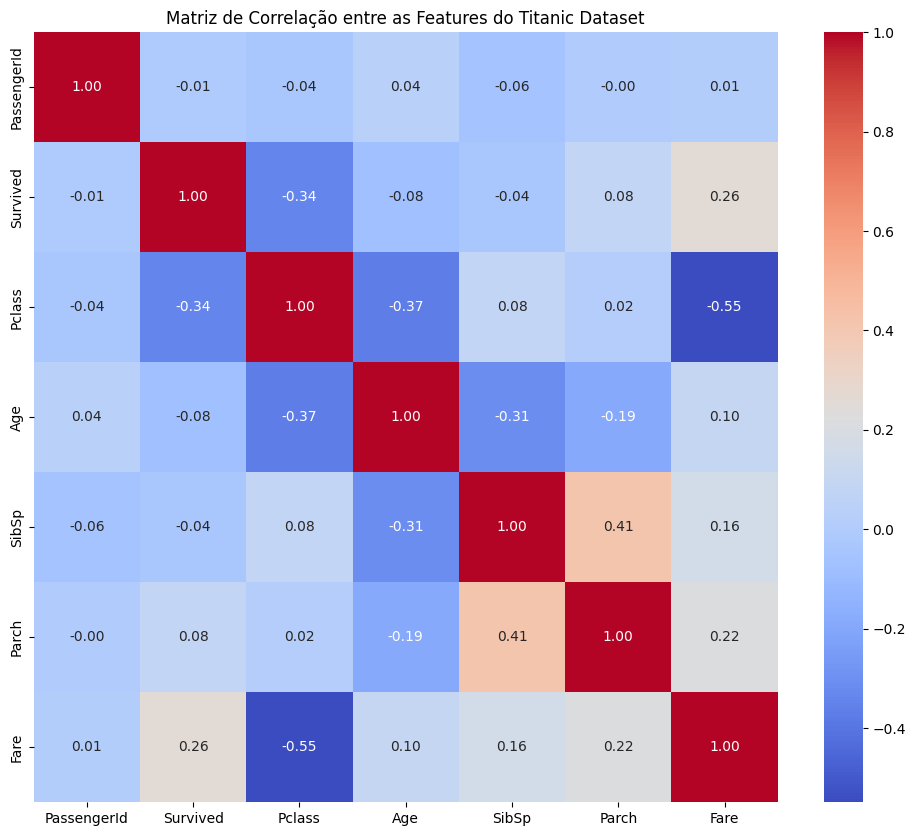

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Solicitar upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o conjunto de dados
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar os gráficos de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Features do Titanic Dataset')
plt.show()


##Tentando melhorar a representação gráfica da matriz de correlação com uma representação gráfica que faz uso também de um dendograma para exibir a corelação entre as features

##Então temos:

* Matriz de Correlação entre as Features do Titanic Dataset

* Mapa de cluster (dendograma) no formato de Mapa de Calor da Matriz de Correlação

* Gráfico de Violino da Idade por Sobrevivência

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (1).csv


<ipython-input-2-27e1d19ff8d3>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


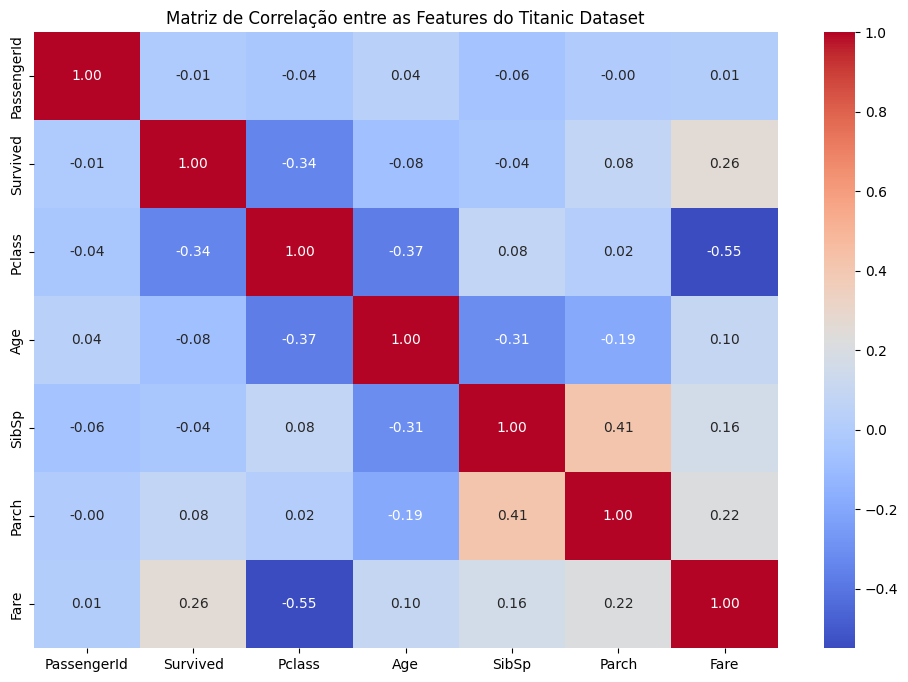

<Figure size 1200x800 with 0 Axes>

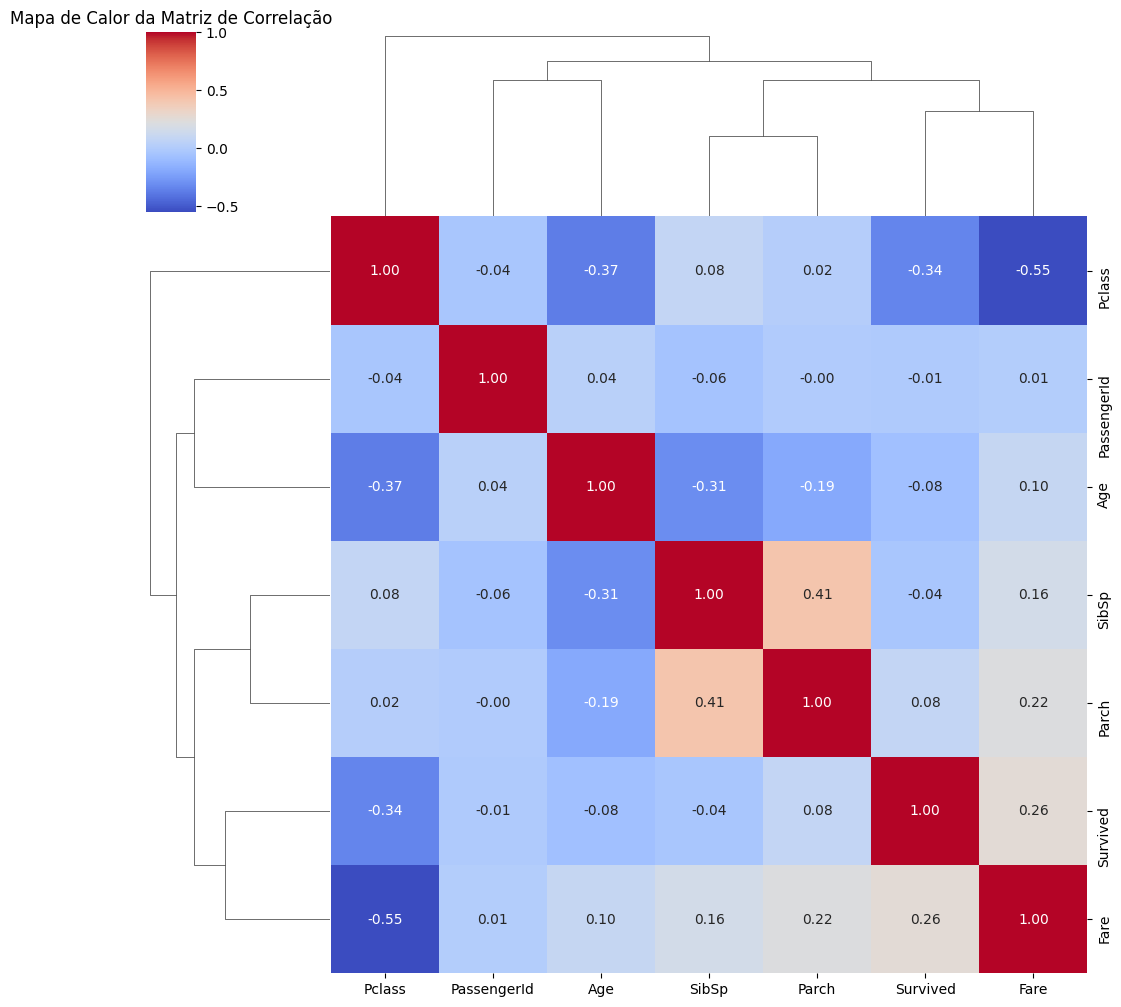

<ipython-input-2-27e1d19ff8d3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='muted')


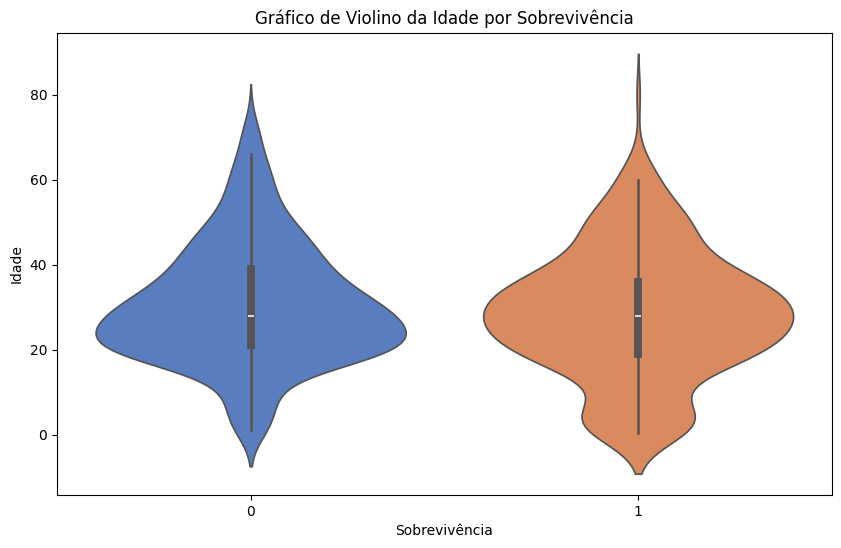

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Solicitar upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o conjunto de dados
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar o gráfico de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Features do Titanic Dataset')
plt.show()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

# Plotar o gráfico de violino para a idade por sobrevivência
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='muted')
plt.title('Gráfico de Violino da Idade por Sobrevivência')
plt.xlabel('Sobrevivência')
plt.ylabel('Idade')
plt.show()


##Exibindo na tela o gráfico da hierarquia das features do dataset do Titanic no formato de dendograma.

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (2).csv


<ipython-input-3-6b3cf4ca6dcf>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


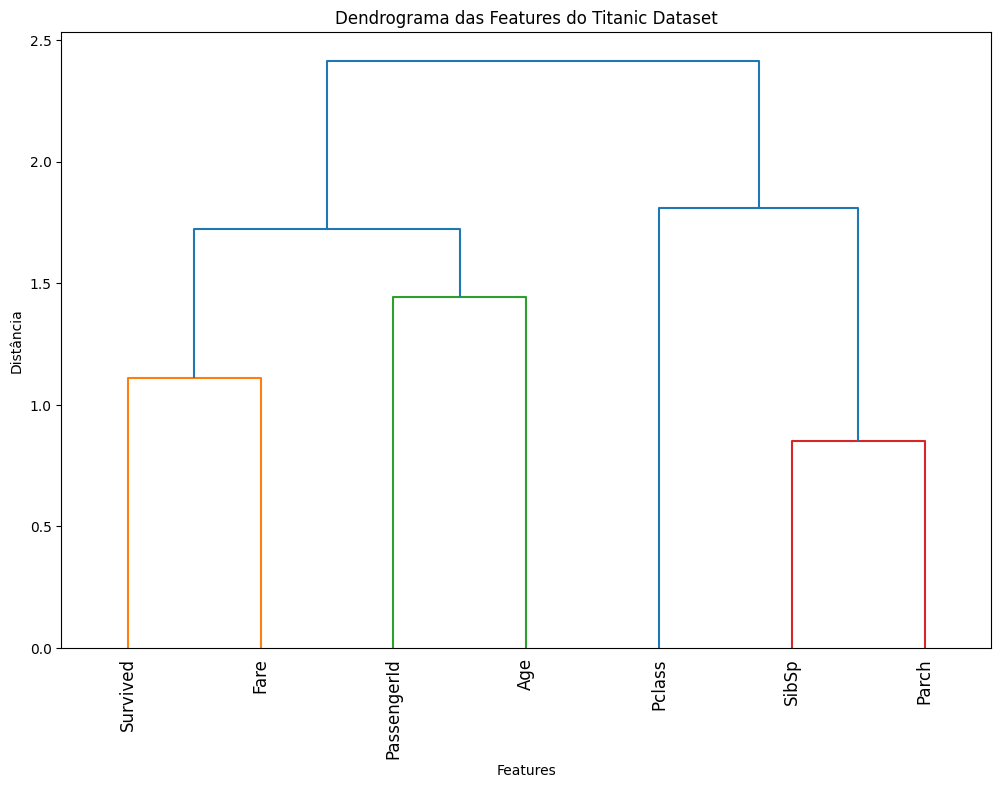

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from google.colab import files

# Solicitar upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o conjunto de dados
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(correlation_matrix, method='ward'), labels=correlation_matrix.index, leaf_rotation=90)
plt.title('Dendrograma das Features do Titanic Dataset')
plt.xlabel('Features')
plt.ylabel('Distância')
plt.show()


##Exibindo na tela a representação gráfica da clusterização por meio do K-means e do DBSCAN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


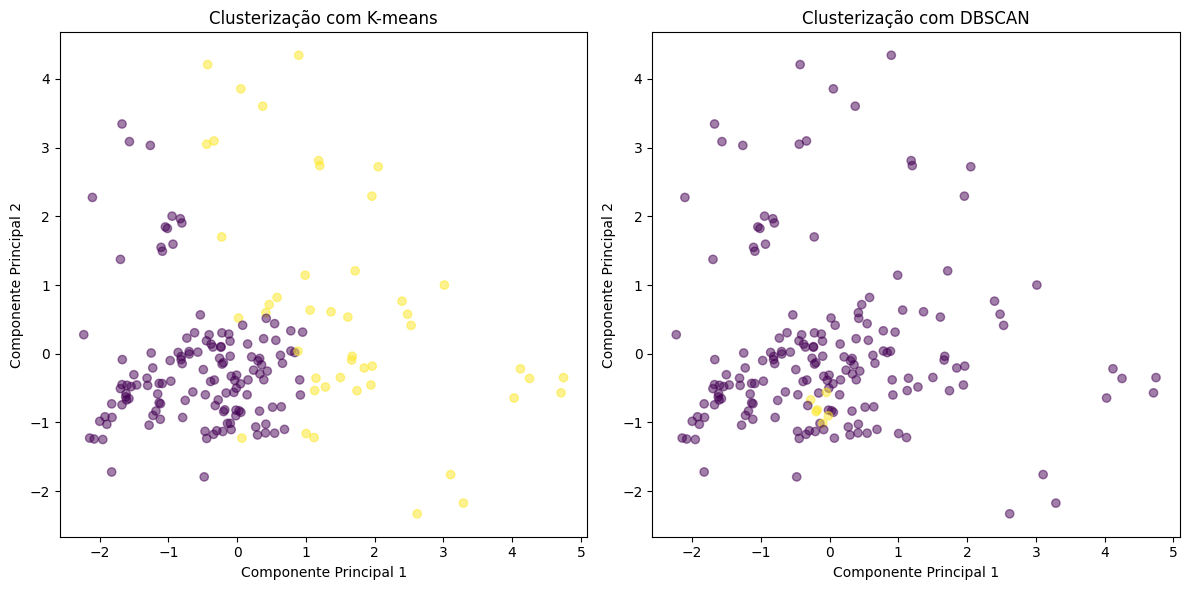

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar o conjunto de dados do Titanic
url = "/content/titanic.csv"
df = pd.read_csv(url)

# Tratar valores ausentes
df.dropna(inplace=True)

# Selecionar apenas as colunas numéricas para clusterização
df_numeric = df.select_dtypes(include=np.number)

# Padronizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Reduzir a dimensionalidade com PCA para visualização em 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualizar a clusterização com K-means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('Clusterização com K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Visualizar a clusterização com DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('Clusterização com DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()


#Aprendizado de Máquina

#A partir de agora iremos implementar e estudar o melhor classificador estatístico do aprendizado de máquina no cenário do dataset do Titanic para ser usado para classificar novos passageiros

##Agora iremos começar a implementação dos algoritmos para os modelos de aprendizado estatístico para Regressão Logística e Regressão Polinomial com as biblioteca do Python Scikit-learn


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Implementando o algoritmo para a Regreção Logística exibindo também as medidas de desempenho Acurácia, Precisão, Revocação, F1 Score e Suporte

In [ ]:
# Inicializar e treinar o modelo de regressão logística
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_log_reg = log_reg_model.predict(X_test)

# Avaliar a precisão do modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Acurácia da Regressão Logística:", accuracy_log_reg)

# Relatório de classificação
print("\nRelatório de Classificação da Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))


Acurácia da Regressão Logística: 0.8212290502793296

Relatório de Classificação da Regressão Logística:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



##Implementando o algoritmo para a Regreção Polinomial exibindo também as medidas de desempenho Acurácia, Precisão, Revocação, F1 Score e Suporte

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar e treinar o modelo de regressão polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

log_reg_poly_model = LogisticRegression(max_iter=1000)
log_reg_poly_model.fit(X_train_poly, y_train)

# Fazer predições no conjunto de teste
y_pred_log_reg_poly = log_reg_poly_model.predict(X_test_poly)

# Avaliar a precisão do modelo
accuracy_log_reg_poly = accuracy_score(y_test, y_pred_log_reg_poly)
print("Acurácia da Regressão Logística Polinomial:", accuracy_log_reg_poly)

# Relatório de classificação
print("\nRelatório de Classificação da Regressão Logística Polinomial:")
print(classification_report(y_test, y_pred_log_reg_poly))


Acurácia da Regressão Logística Polinomial: 0.8212290502793296

Relatório de Classificação da Regressão Logística Polinomial:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



##Melhorando o algoritmo para as regressões levando em consideração somente a classe com a idade

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from google.colab import files

# Solicitar ao usuário para fazer upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
if 'PassengerId' in df.columns:
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular e exibir métricas
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print("Acurácia:", accuracy)
    print("Acurácia Balanceada:", balanced_accuracy)
    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1 Score:", f1_score)
    print("Suporte:", support)

# Combinações de features
feature_combinations = [('Sex', 'Pclass'), ('Sex', 'Age'), ('Pclass', 'Age')]

for feature1, feature2 in feature_combinations:
    print("\n---", feature1, "e", feature2, "---")

    # Verificar se as colunas estão presentes no DataFrame
    if feature1 in X_train.columns and feature2 in X_train.columns:
        # Regressão logística
        print("\nRegressão Logística:")
        X_combination = X_train[[feature1, feature2]]
        log_reg_model = LogisticRegression(max_iter=1000)
        log_reg_model.fit(X_combination, y_train)
        y_pred_log_reg = log_reg_model.predict(X_combination)
        print("Para", feature1, "e", feature2)
        evaluate_metrics(y_train, y_pred_log_reg)

        # Regressão polinomial
        print("\nRegressão Polinomial:")
        scaler = StandardScaler()
        X_combination_scaled = scaler.fit_transform(X_combination)
        poly_features = PolynomialFeatures(degree=2)
        X_combination_poly = poly_features.fit_transform(X_combination_scaled)
        log_reg_poly_model = LogisticRegression(max_iter=1000)
        log_reg_poly_model.fit(X_combination_poly, y_train)
        X_test_combination_scaled = scaler.transform(X_test[[feature1, feature2]])
        X_test_combination_poly = poly_features.transform(X_test_combination_scaled)
        y_pred_log_reg_poly = log_reg_poly_model.predict(X_test_combination_poly)
        print("Para", feature1, "e", feature2)
        evaluate_metrics(y_test, y_pred_log_reg_poly)
    else:
        print(f"As colunas {feature1} e/ou {feature2} não estão presentes nos dados.")


Por favor, faça o upload do arquivo CSV:


Saving titanic.csv to titanic (20).csv

--- Sex e Pclass ---
As colunas Sex e/ou Pclass não estão presentes nos dados.

--- Sex e Age ---
As colunas Sex e/ou Age não estão presentes nos dados.

--- Pclass e Age ---

Regressão Logística:
Para Pclass e Age
Acurácia: 0.6910112359550562
Acurácia Balanceada: 0.6354040607771951
Precisão: 0.6395348837209303
Revocação: 0.41044776119402987
F1 Score: 0.5
Suporte: None

Regressão Polinomial:
Para Pclass e Age
Acurácia: 0.7150837988826816
Acurácia Balanceada: 0.6953024453024452
Precisão: 0.6825396825396826
Revocação: 0.581081081081081
F1 Score: 0.6277372262773723
Suporte: None


#Podemos então observar que a Regressão Polinomial foi melhor do que a Regressão Logística tendo a Reg. Polinomial uma acurácia e uma precisão respectivamente de 71 % e 68 % em quanto que a Reg. Logística teve para a acurácia e precisão respectivamente 69 % e 63 %

##Vamos exibir graficamente a zona de incerteza do treinamento das regressões logística e polinomial

Por favor, faça o upload do arquivo CSV:


Saving titanic.csv to titanic (7).csv


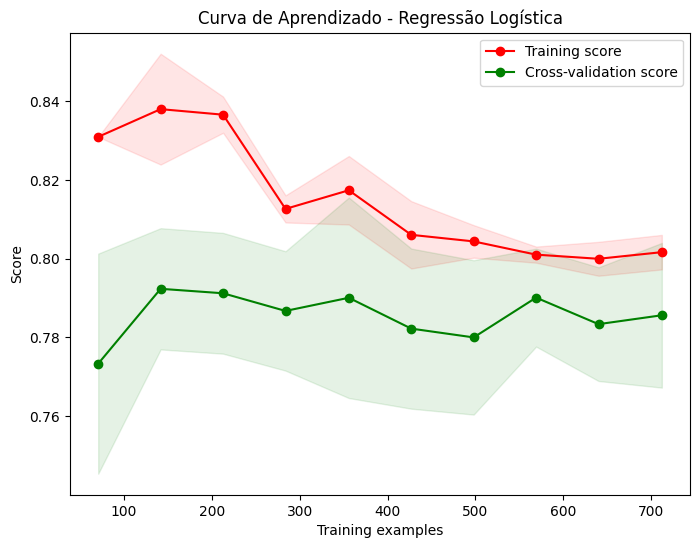

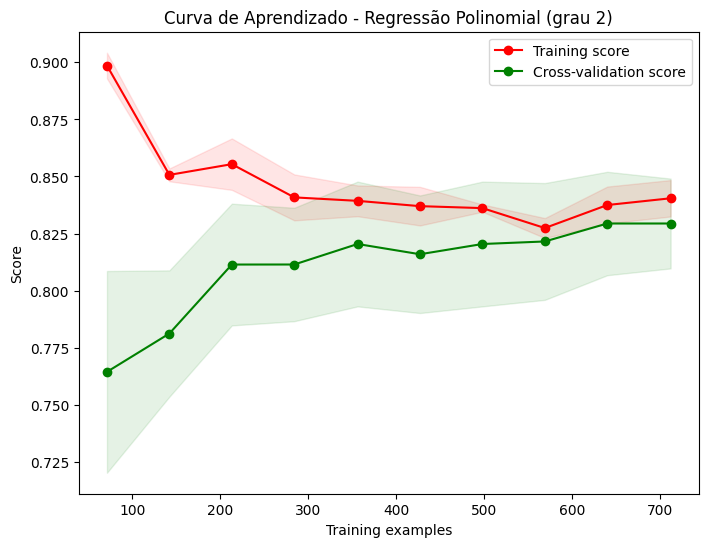

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Solicitar ao usuário para fazer upload do arquivo CSV
from google.colab import files
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
if 'PassengerId' in df.columns:
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão logística
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Curva de Aprendizado - Regressão Logística")
plt.legend(loc="best")
plt.show()

# Regressão polinomial
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

poly_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
train_sizes_poly, train_scores_poly, test_scores_poly = learning_curve(poly_model, X_poly, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_poly = np.mean(train_scores_poly, axis=1)
train_scores_std_poly = np.std(train_scores_poly, axis=1)
test_scores_mean_poly = np.mean(test_scores_poly, axis=1)
test_scores_std_poly = np.std(test_scores_poly, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes_poly, train_scores_mean_poly - train_scores_std_poly, train_scores_mean_poly + train_scores_std_poly, alpha=0.1, color="r")
plt.fill_between(train_sizes_poly, test_scores_mean_poly - test_scores_std_poly, test_scores_mean_poly + test_scores_std_poly, alpha=0.1, color="g")
plt.plot(train_sizes_poly, train_scores_mean_poly, 'o-', color="r", label="Training score")
plt.plot(train_sizes_poly, test_scores_mean_poly, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title(f"Curva de Aprendizado - Regressão Polinomial (grau {degree})")
plt.legend(loc="best")
plt.show()


#Breve explicação do grau do polinômio

##O grau 2 na curva de aprendizado da regressão polinomial refere-se ao grau do polinômio usado no modelo de regressão polinomial. Em outras palavras, quando ajustamos um modelo de regressão polinomial, estamos ajustando uma curva polinomial aos dados em vez de uma linha reta (como na regressão linear simples).

##A regressão polinomial de grau 2 significa que estamos ajustando uma curva polinomial de segunda ordem aos dados. Isso implica que o modelo terá uma forma parabólica, pois a equação polinomial terá termos até o grau 2. Por exemplo, a equação de regressão polinomial de grau 2 pode ser representada por:

##y=β0 + β1 x + β2 x^2

##Onde:

##y é a variável dependente (target),

##x é a variável independente (feature),

##e β0, β1 e β2 são os coeficientes do modelo.

##A escolha do grau do polinômio é uma decisão importante ao ajustar modelos de regressão polinomial, pois pode afetar a capacidade do modelo de se ajustar aos dados. Graus mais altos podem resultar em modelos mais flexíveis, capazes de capturar padrões mais complexos nos dados, mas também podem aumentar o risco de overfitting. Portanto, é comum testar diferentes graus polinomiais e avaliar o desempenho do modelo para determinar o grau ótimo para os dados em questão.

#Breve explicação para Training Score e o Cross-Validation Score

##No contexto do gráfico da curva de aprendizado para modelos de regressão logística e polinomial, o "Training Score" e o "Cross-Validation Score" representam métricas de desempenho do modelo em relação aos dados de treinamento e validação cruzada, respectivamente. Aqui está o significado de cada um:

* Training Score (Pontuação de Treinamento): Este é o desempenho do modelo nos dados de treinamento utilizados para ajustar o modelo. Representa a habilidade do modelo em ajustar os dados de treinamento, ou seja, quão bem o modelo se ajusta aos dados que ele viu durante o treinamento. É comum que o desempenho do modelo nos dados de treinamento seja muito alto, uma vez que o modelo está sendo ajustado a esses dados específicos.

* Cross-Validation Score (Pontuação de Validação Cruzada): Esta é uma medida do desempenho do modelo em dados que não foram utilizados durante o treinamento, ou seja, dados de validação cruzada. A validação cruzada é uma técnica usada para avaliar o desempenho de um modelo em um conjunto de dados independente. O cross-validation score fornece uma estimativa de como o modelo se comportará em dados não vistos, o que é útil para avaliar o poder de generalização do modelo. É calculado tirando a média das pontuações de desempenho do modelo em várias divisões diferentes do conjunto de dados.

##No gráfico da curva de aprendizado, essas pontuações são plotadas em relação ao tamanho do conjunto de treinamento. Isso nos dá uma ideia de como o desempenho do modelo varia à medida que aumentamos o número de amostras de treinamento. Idealmente, esperamos ver tanto o Training Score quanto o Cross-Validation Score aumentarem à medida que aumentamos o tamanho do conjunto de treinamento, indicando que o modelo está aprendendo com sucesso a partir dos dados e generalizando bem para novos dados.

#Vamos agora implementar os classificadores estatísticos do aprendizado de máquina:

* Árvore de Decisão

* Floresta Randômica

* KNN

* SVN

* Rede Neural Artificial

##Com a exibição das medidas de desempenho e curva ROC com cálculo da AUC para cada classificador

Por favor, faça o upload do arquivo CSV:


Saving titanic.csv to titanic (24).csv
--- Decision Tree ---
Acurácia: 0.7821229050279329
Acurácia Balanceada: 0.7783783783783784
Precisão: 0.7272727272727273
Revocação: 0.7567567567567568
F1 Score: 0.7417218543046358

--- Random Forest ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8117117117117117
Precisão: 0.8
Revocação: 0.7567567567567568
F1 Score: 0.7777777777777778

--- KNN ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7934362934362934
Precisão: 0.782608695652174
Revocação: 0.7297297297297297
F1 Score: 0.7552447552447553

--- SVM ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8037323037323038
Precisão: 0.8387096774193549
Revocação: 0.7027027027027027
F1 Score: 0.7647058823529411



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



--- Neural Network ---
Acurácia: 0.8100558659217877
Acurácia Balanceada: 0.7922136422136422
Precisão: 0.8225806451612904
Revocação: 0.6891891891891891
F1 Score: 0.75



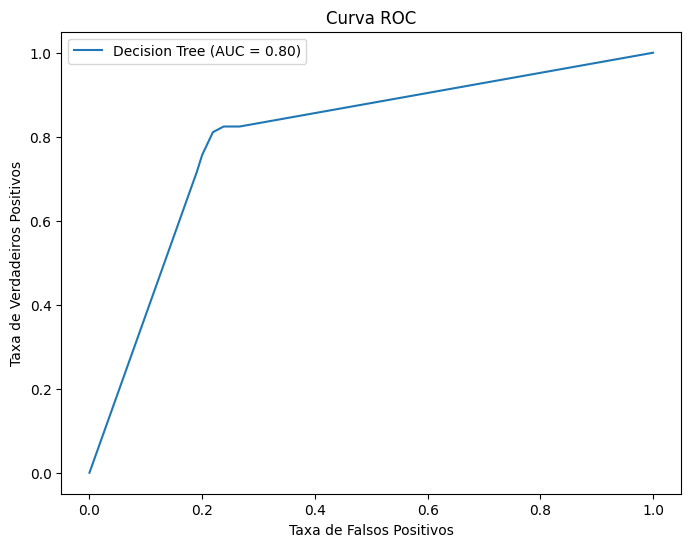

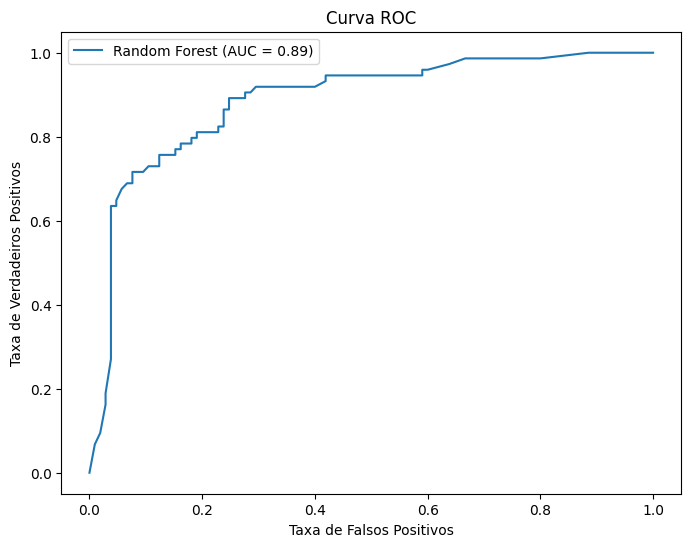

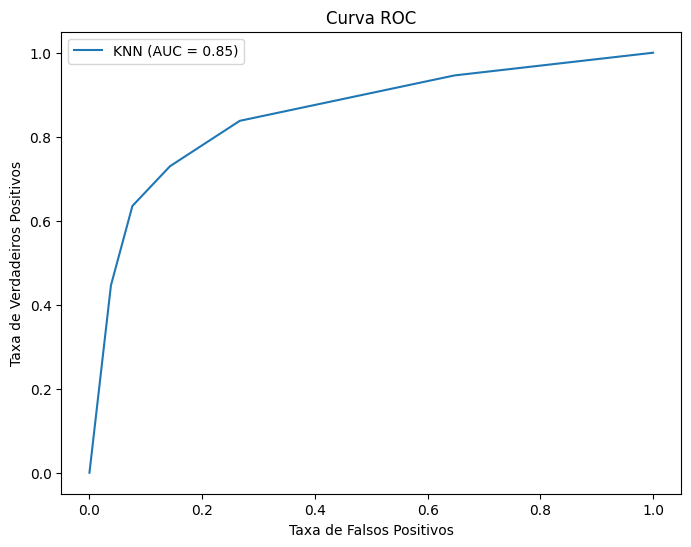

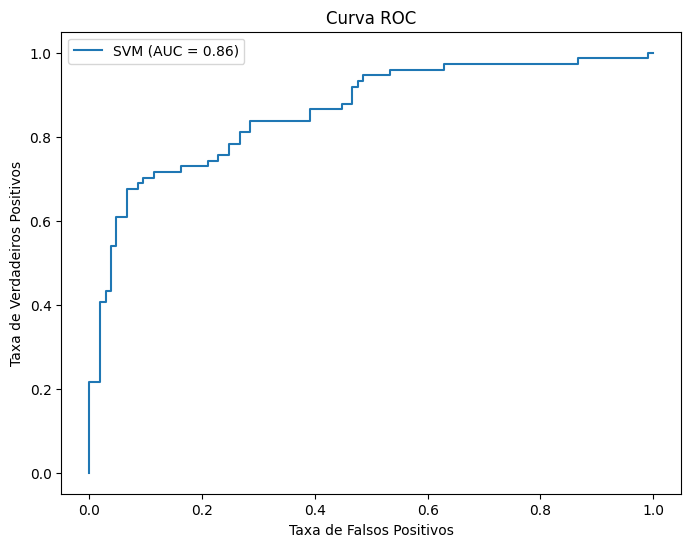

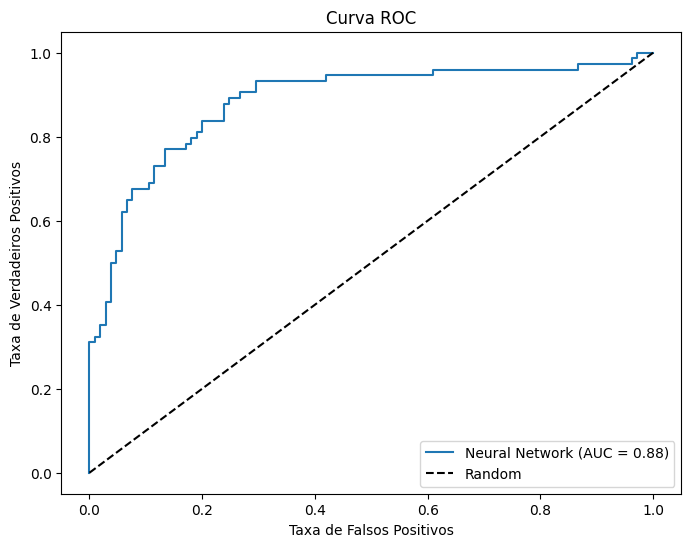

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from google.colab import files

# Solicitar ao usuário para fazer upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
if 'PassengerId' in df.columns:
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar os classificadores
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(random_state=42)
}

# Função para calcular e exibir métricas
def evaluate_metrics(classifier_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print("---", classifier_name, "---")
    print("Acurácia:", accuracy)
    print("Acurácia Balanceada:", balanced_accuracy)
    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1 Score:", f1_score)
    print()

# Função para plotar a curva ROC
def plot_roc_curve(classifier_name, y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc:.2f})')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()

# Iterar sobre os classificadores
for classifier_name, classifier in classifiers.items():
    # Treinar o classificador
    classifier.fit(X_train_scaled, y_train)

    # Fazer predições no conjunto de teste
    y_pred = classifier.predict(X_test_scaled)
    y_proba = classifier.predict_proba(X_test_scaled)[:, 1]

    # Avaliar as métricas de desempenho
    evaluate_metrics(classifier_name, y_test, y_pred)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plot_roc_curve(classifier_name, y_test, y_proba)

# Mostrar os gráficos
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.legend()
plt.show()


#Vamos agora implementar os classificadores estatísticos do aprendizado de máquina (**acrescentando Gaussian Naive Bayes e Gradient Boosting**) :

* Árvore de Decisão

* Floresta Randômica

* KNN

* SVN

* Rede Neural Artificial

* Gaussian Naive Bayes

* Gradient Boosting

##Com a exibição das medidas de desempenho e curva ROC com cálculo da AUC para cada classificador

Por favor, faça o upload do arquivo CSV:


Saving titanic.csv to titanic (25).csv
--- Decision Tree ---
Acurácia: 0.7821229050279329
Acurácia Balanceada: 0.7783783783783784
Precisão: 0.7272727272727273
Revocação: 0.7567567567567568
F1 Score: 0.7417218543046358

--- Random Forest ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8117117117117117
Precisão: 0.8
Revocação: 0.7567567567567568
F1 Score: 0.7777777777777778

--- KNN ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7934362934362934
Precisão: 0.782608695652174
Revocação: 0.7297297297297297
F1 Score: 0.7552447552447553

--- SVM ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8037323037323038
Precisão: 0.8387096774193549
Revocação: 0.7027027027027027
F1 Score: 0.7647058823529411



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



--- Neural Network ---
Acurácia: 0.8100558659217877
Acurácia Balanceada: 0.7922136422136422
Precisão: 0.8225806451612904
Revocação: 0.6891891891891891
F1 Score: 0.75

--- Gaussian Naive Bayes ---
Acurácia: 0.770949720670391
Acurácia Balanceada: 0.7648648648648648
Precisão: 0.72
Revocação: 0.7297297297297297
F1 Score: 0.7248322147651007

--- Gradient Boosting ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7854568854568855
Precisão: 0.819672131147541
Revocação: 0.6756756756756757
F1 Score: 0.7407407407407408

--- Extra Trees ---
Acurácia: 0.8156424581005587
Acurácia Balanceada: 0.8129343629343629
Precisão: 0.7662337662337663
Revocação: 0.7972972972972973
F1 Score: 0.7814569536423841



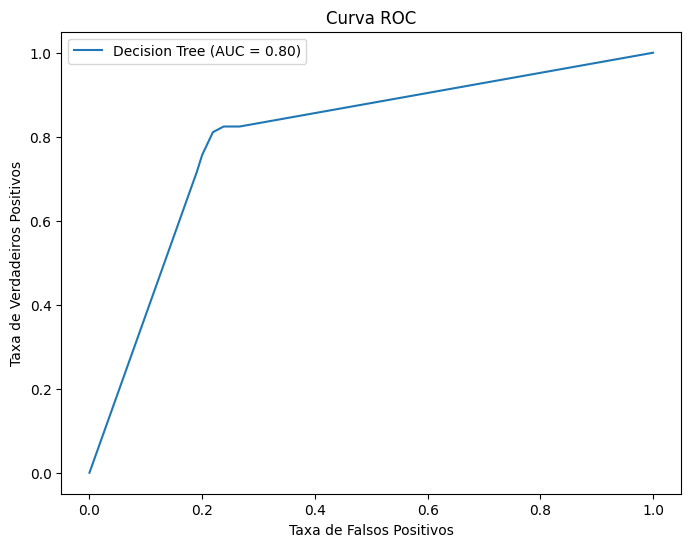

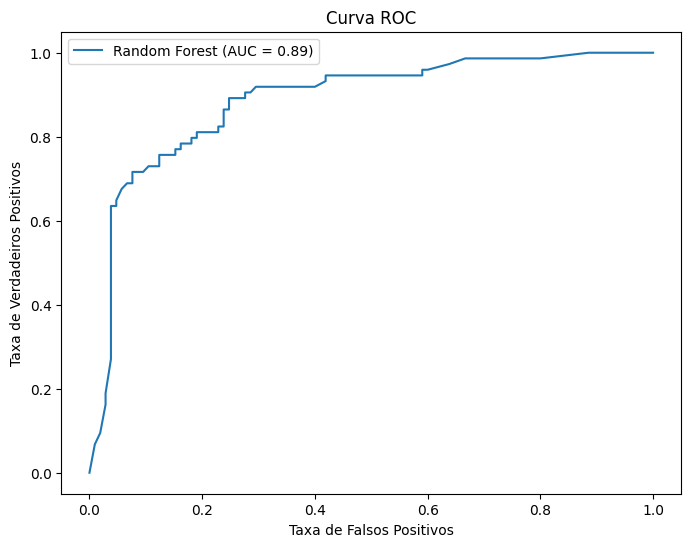

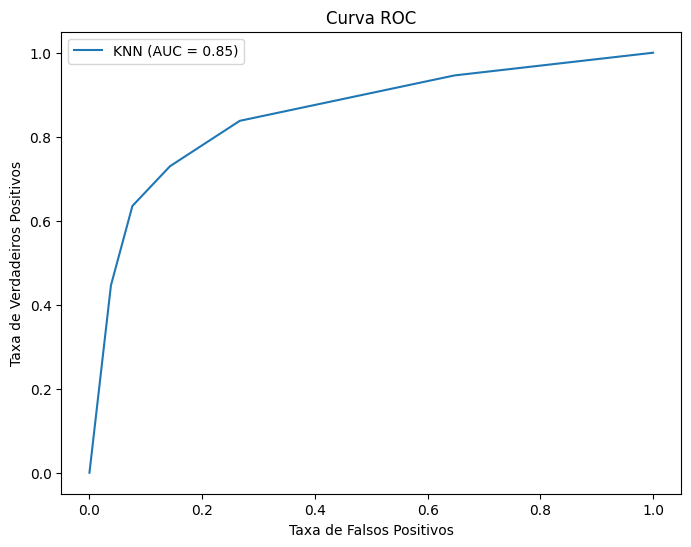

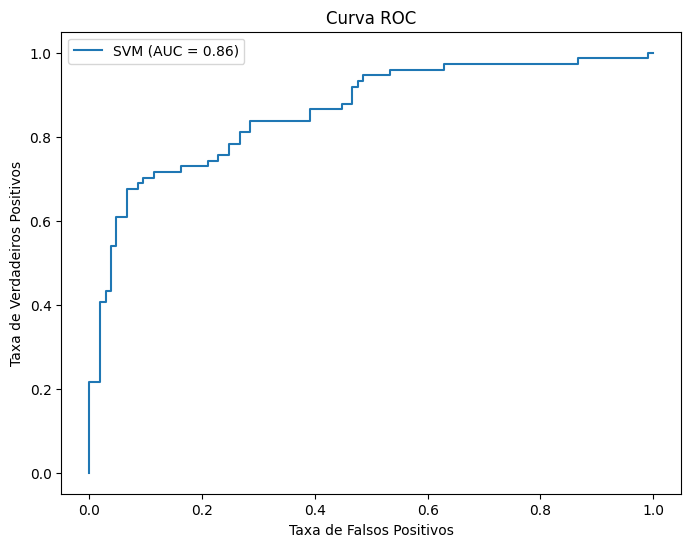

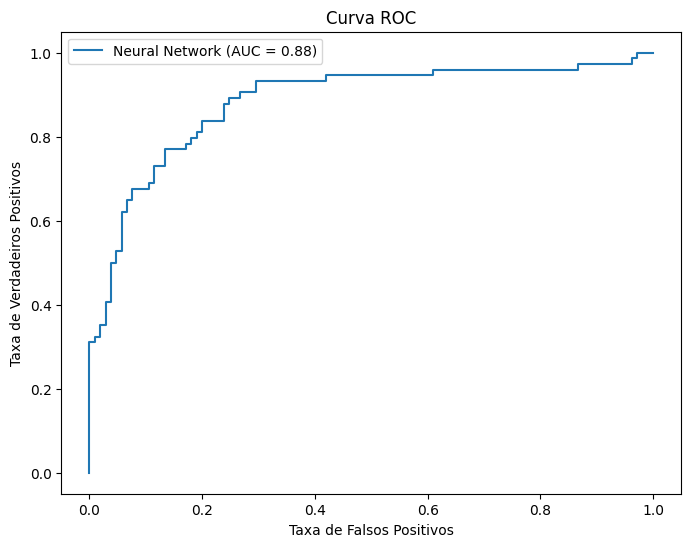

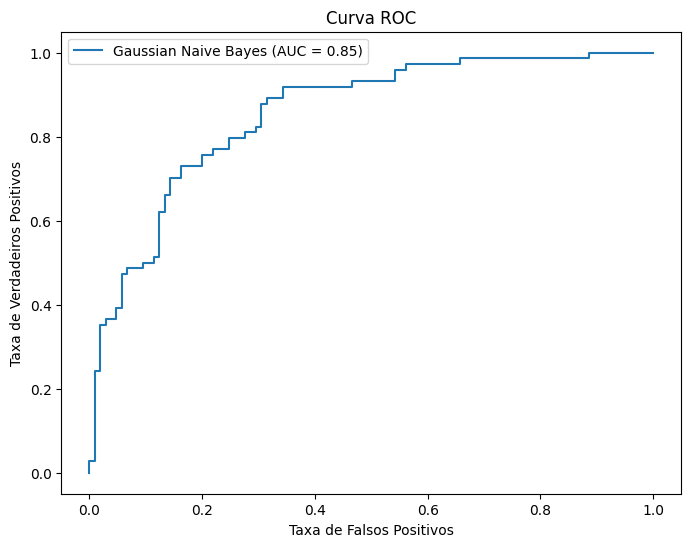

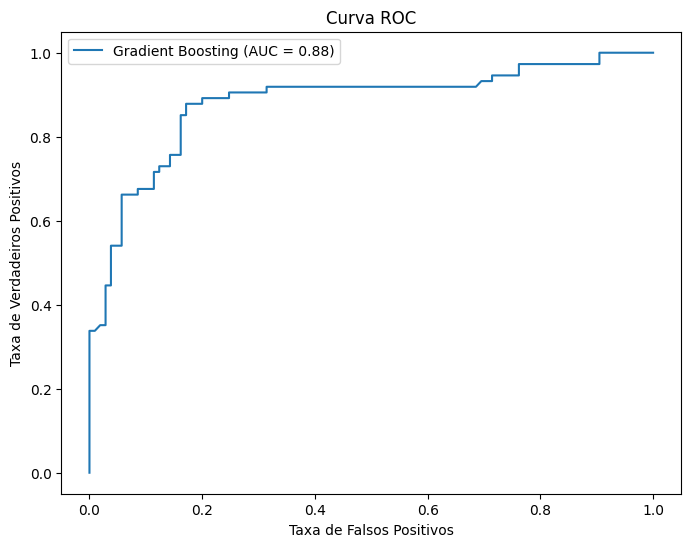

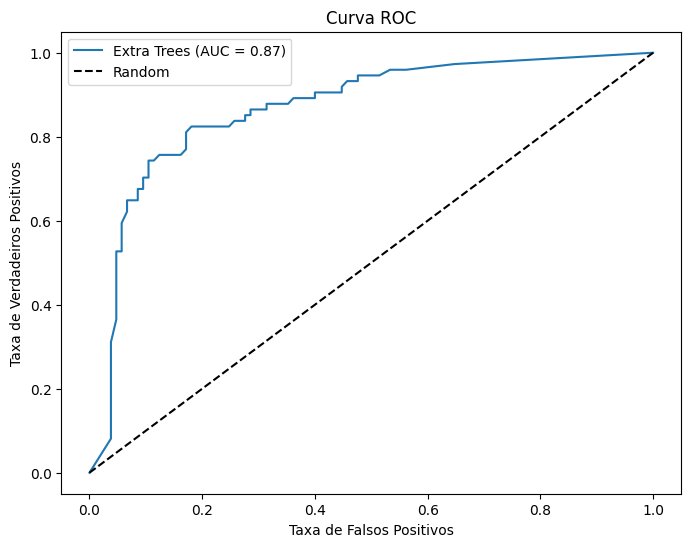

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from google.colab import files

# Solicitar ao usuário para fazer upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
if 'PassengerId' in df.columns:
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar os classificadores
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Função para calcular e exibir métricas
def evaluate_metrics(classifier_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print("---", classifier_name, "---")
    print("Acurácia:", accuracy)
    print("Acurácia Balanceada:", balanced_accuracy)
    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1 Score:", f1_score)
    print()

# Função para plotar a curva ROC
def plot_roc_curve(classifier_name, y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc:.2f})')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()

# Iterar sobre os classificadores
for classifier_name, classifier in classifiers.items():
    # Treinar o classificador
    classifier.fit(X_train_scaled, y_train)

    # Fazer predições no conjunto de teste
    y_pred = classifier.predict(X_test_scaled)
    y_proba = classifier.predict_proba(X_test_scaled)[:, 1]

    # Avaliar as métricas de desempenho
    evaluate_metrics(classifier_name, y_test, y_pred)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plot_roc_curve(classifier_name, y_test, y_proba)

# Mostrar os gráficos
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.legend()
plt.show()


##Para Implementaro o classificador estatístico CatBooster e necessário intalar a biblioteca específica deste classificador

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00


##Vamos agora implementar os classificadores estatísticos do aprendizado de máquina (**acrescentando Ada Boosti, XGBoost e CatBoost**) - **Totalizando 10** classificadores estudados e comparados :

* Árvore de Decisão

* Floresta Randômica

* KNN

* SVN

* Rede Neural Artificial

* Gaussian Naive Bayes

* Gradient Boosting

* Ada Boosti

* XGBoost

* CatBoost

##Com a exibição das medidas de desempenho e curva ROC com cálculo da AUC para cada classificador

Por favor, faça o upload do arquivo CSV:


Saving titanic.csv to titanic (26).csv
--- Decision Tree ---
Acurácia: 0.7821229050279329
Acurácia Balanceada: 0.7783783783783784
Precisão: 0.7272727272727273
Revocação: 0.7567567567567568
F1 Score: 0.7417218543046358

--- Random Forest ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8117117117117117
Precisão: 0.8
Revocação: 0.7567567567567568
F1 Score: 0.7777777777777778

--- KNN ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7934362934362934
Precisão: 0.782608695652174
Revocação: 0.7297297297297297
F1 Score: 0.7552447552447553

--- SVM ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8037323037323038
Precisão: 0.8387096774193549
Revocação: 0.7027027027027027
F1 Score: 0.7647058823529411



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



--- Neural Network ---
Acurácia: 0.8100558659217877
Acurácia Balanceada: 0.7922136422136422
Precisão: 0.8225806451612904
Revocação: 0.6891891891891891
F1 Score: 0.75

--- Gaussian Naive Bayes ---
Acurácia: 0.770949720670391
Acurácia Balanceada: 0.7648648648648648
Precisão: 0.72
Revocação: 0.7297297297297297
F1 Score: 0.7248322147651007

--- Gradient Boosting ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7854568854568855
Precisão: 0.819672131147541
Revocação: 0.6756756756756757
F1 Score: 0.7407407407407408

--- Extra Trees ---
Acurácia: 0.8156424581005587
Acurácia Balanceada: 0.8129343629343629
Precisão: 0.7662337662337663
Revocação: 0.7972972972972973
F1 Score: 0.7814569536423841

--- AdaBoost ---
Acurácia: 0.8044692737430168
Acurácia Balanceada: 0.7974259974259974
Precisão: 0.7671232876712328
Revocação: 0.7567567567567568
F1 Score: 0.761904761904762

--- XGBoost ---
Acurácia: 0.8212290502793296
Acurácia Balanceada: 0.8117117117117117
Precisão: 0.8
Revocação: 0.75675675675675

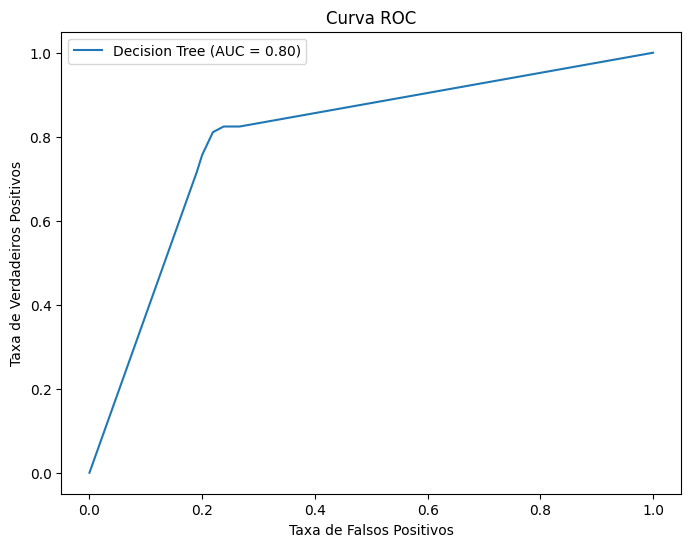

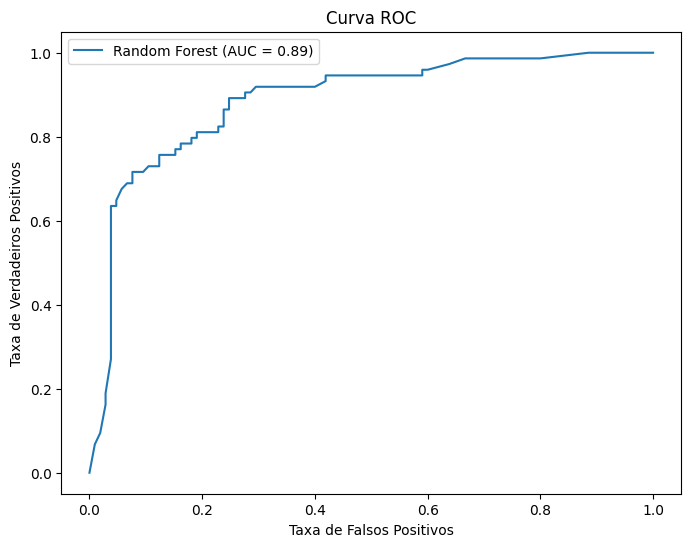

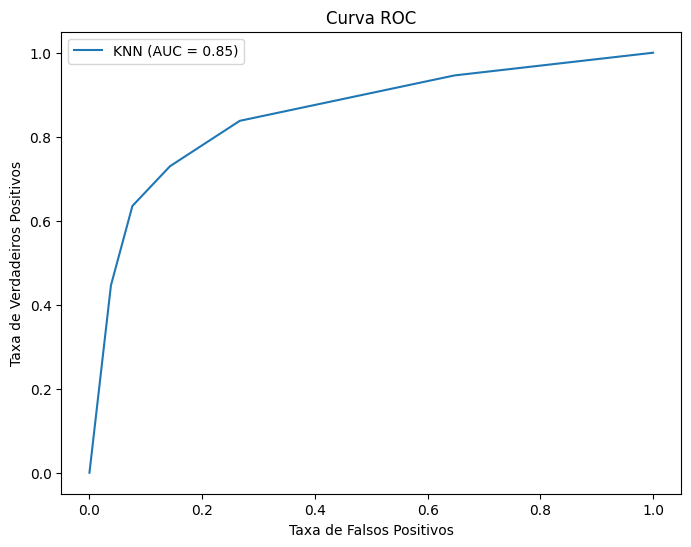

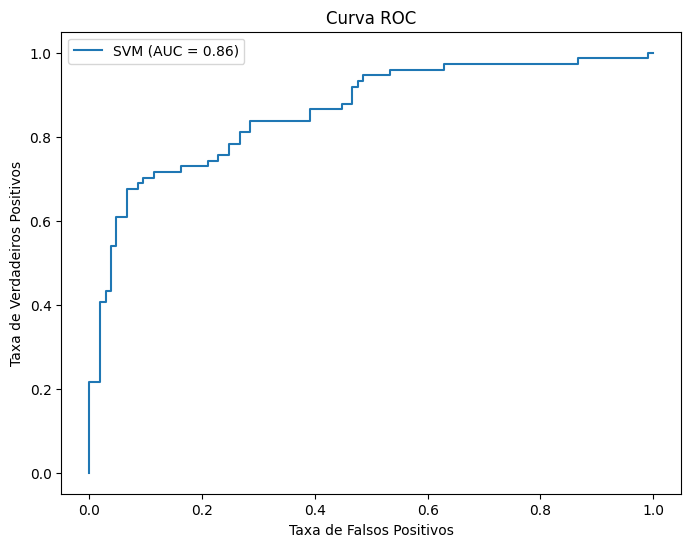

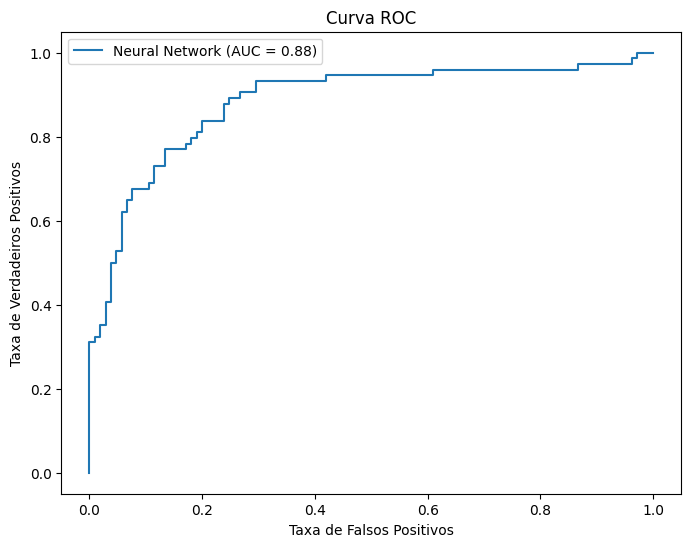

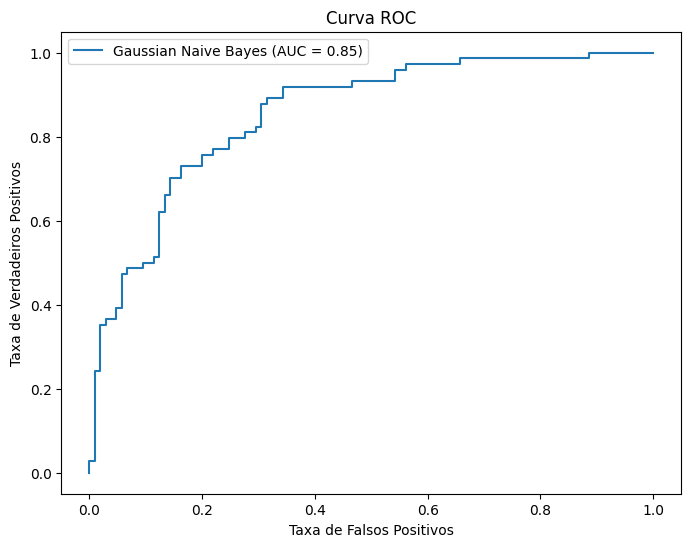

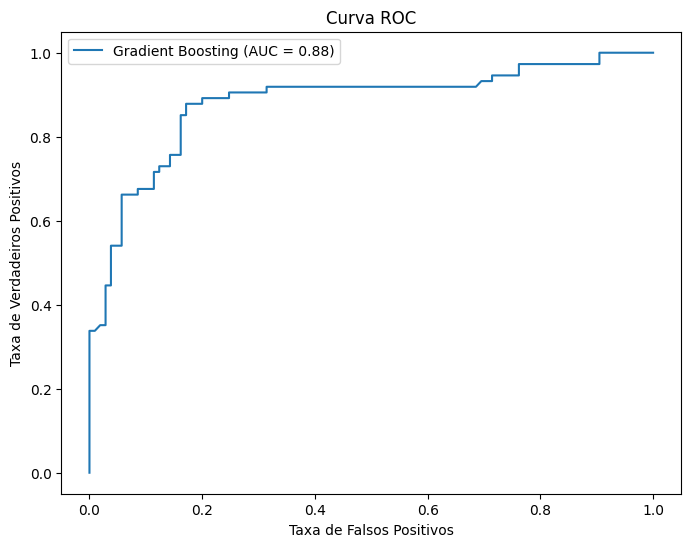

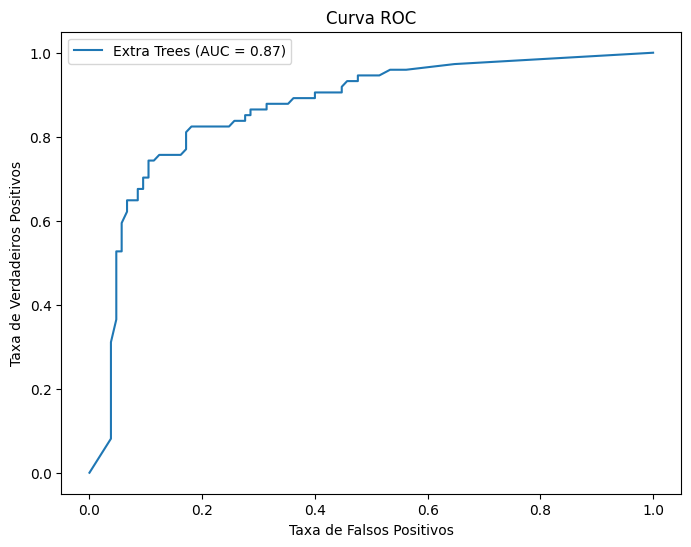

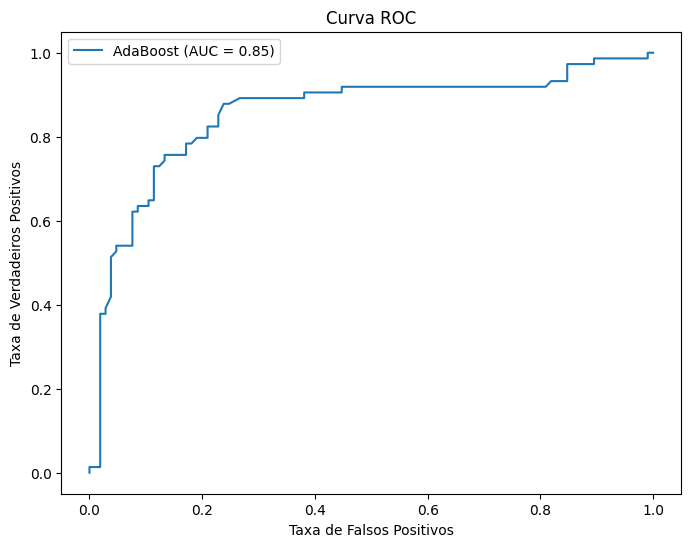

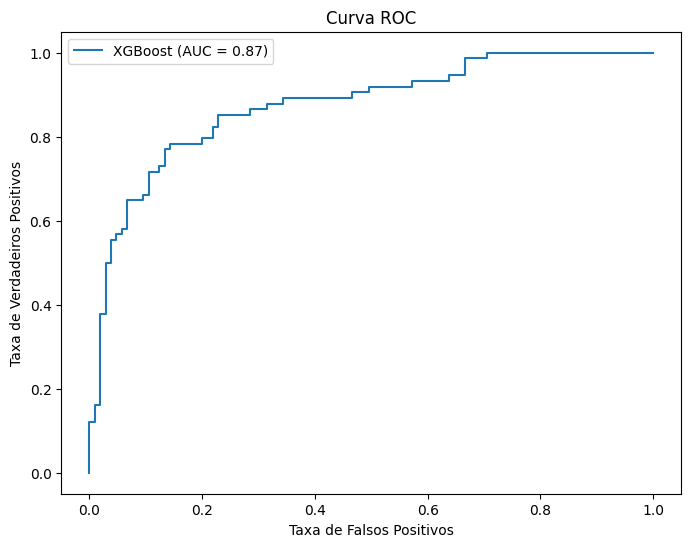

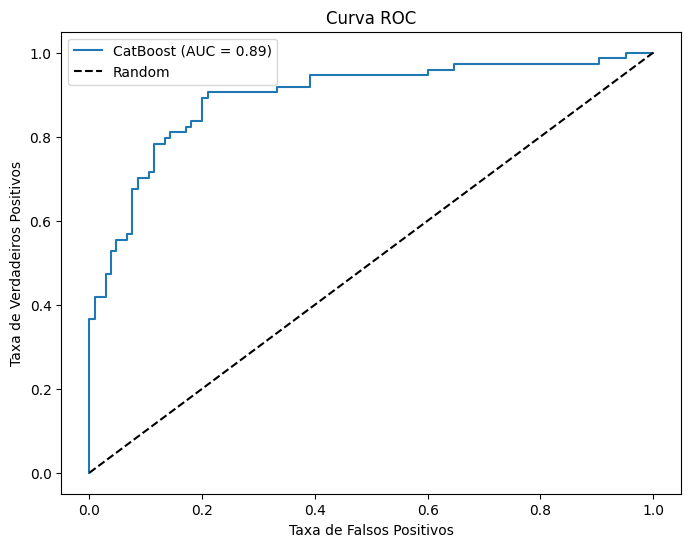

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from google.colab import files

# Solicitar ao usuário para fazer upload do arquivo CSV
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
if 'PassengerId' in df.columns:
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar os classificadores
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Função para calcular e exibir métricas
def evaluate_metrics(classifier_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
    print("---", classifier_name, "---")
    print("Acurácia:", accuracy)
    print("Acurácia Balanceada:", balanced_accuracy)
    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1 Score:", f1_score)
    print()

# Função para plotar a curva ROC
def plot_roc_curve(classifier_name, y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc:.2f})')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()

# Iterar sobre os classificadores
for classifier_name, classifier in classifiers.items():
    # Treinar o classificador
    classifier.fit(X_train_scaled, y_train)

    # Fazer predições no conjunto de teste
    y_pred = classifier.predict(X_test_scaled)
    y_proba = classifier.predict_proba(X_test_scaled)[:, 1]

    # Avaliar as métricas de desempenho
    evaluate_metrics(classifier_name, y_test, y_pred)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plot_roc_curve(classifier_name, y_test, y_proba)

# Mostrar os gráficos
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.legend()
plt.show()


#Melhorando a formatação da representação das curvas ROC de cada classificador estístico com cálculo da AUC e as respectivas medidades de desempenho para melhor observação, comparação e análise neste Projeto de Estudo (**11 classificadores**)

Por favor, faça o uplod do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (30).csv


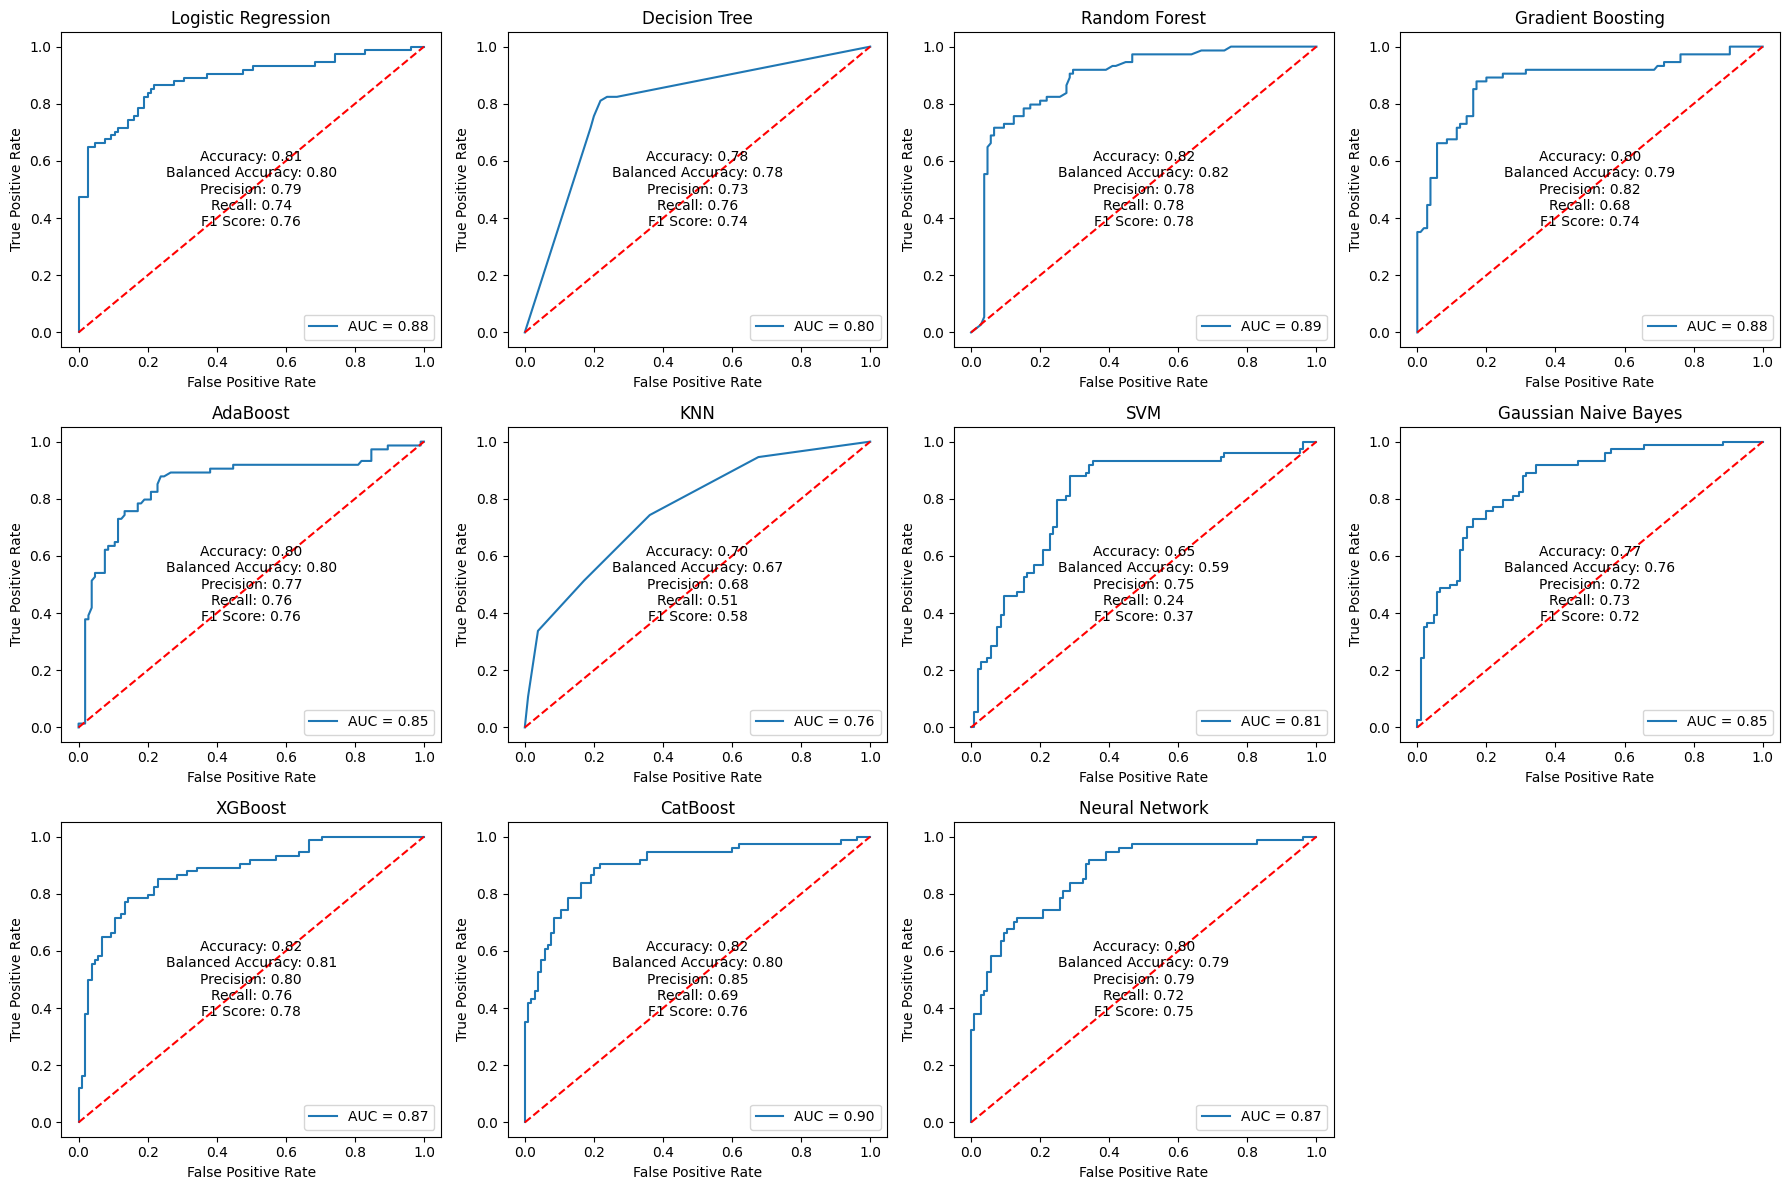

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


# Solicitar ao usuário para fazer upload do arquivo CSV
#print("Por favor, faça o upload do arquivo CSV:")
#uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
#file_name = list(uploaded.keys())[0]
#df = pd.read_csv(file_name)

print("Por favor, faça o uplod do arquivo CSV com os dados do Titanic:")

# Carregar o dataset do Titanic
file = files.upload()
df = pd.read_csv("titanic.csv")

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os classificadores
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # Habilitar a probabilidade para a curva ROC
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Treinar e avaliar cada classificador
plt.figure(figsize=(18, 12))
for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular e plotar a curva ROC
    if hasattr(clf, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

        plt.subplot(3, 4, i)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.title(clf_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

#Exibindo agora após as curvas ROC, uma tabela do melhor classificador estatístico para o pior, em desempenho, com ranking da colocação dos **11 classificadores** estudados e comparados.

#Exibindo também após a tabela a representação gráfica do ranking dos classificadores estatísticos no aprendizado de máquina

Por favor, faça o uplod do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (33).csv


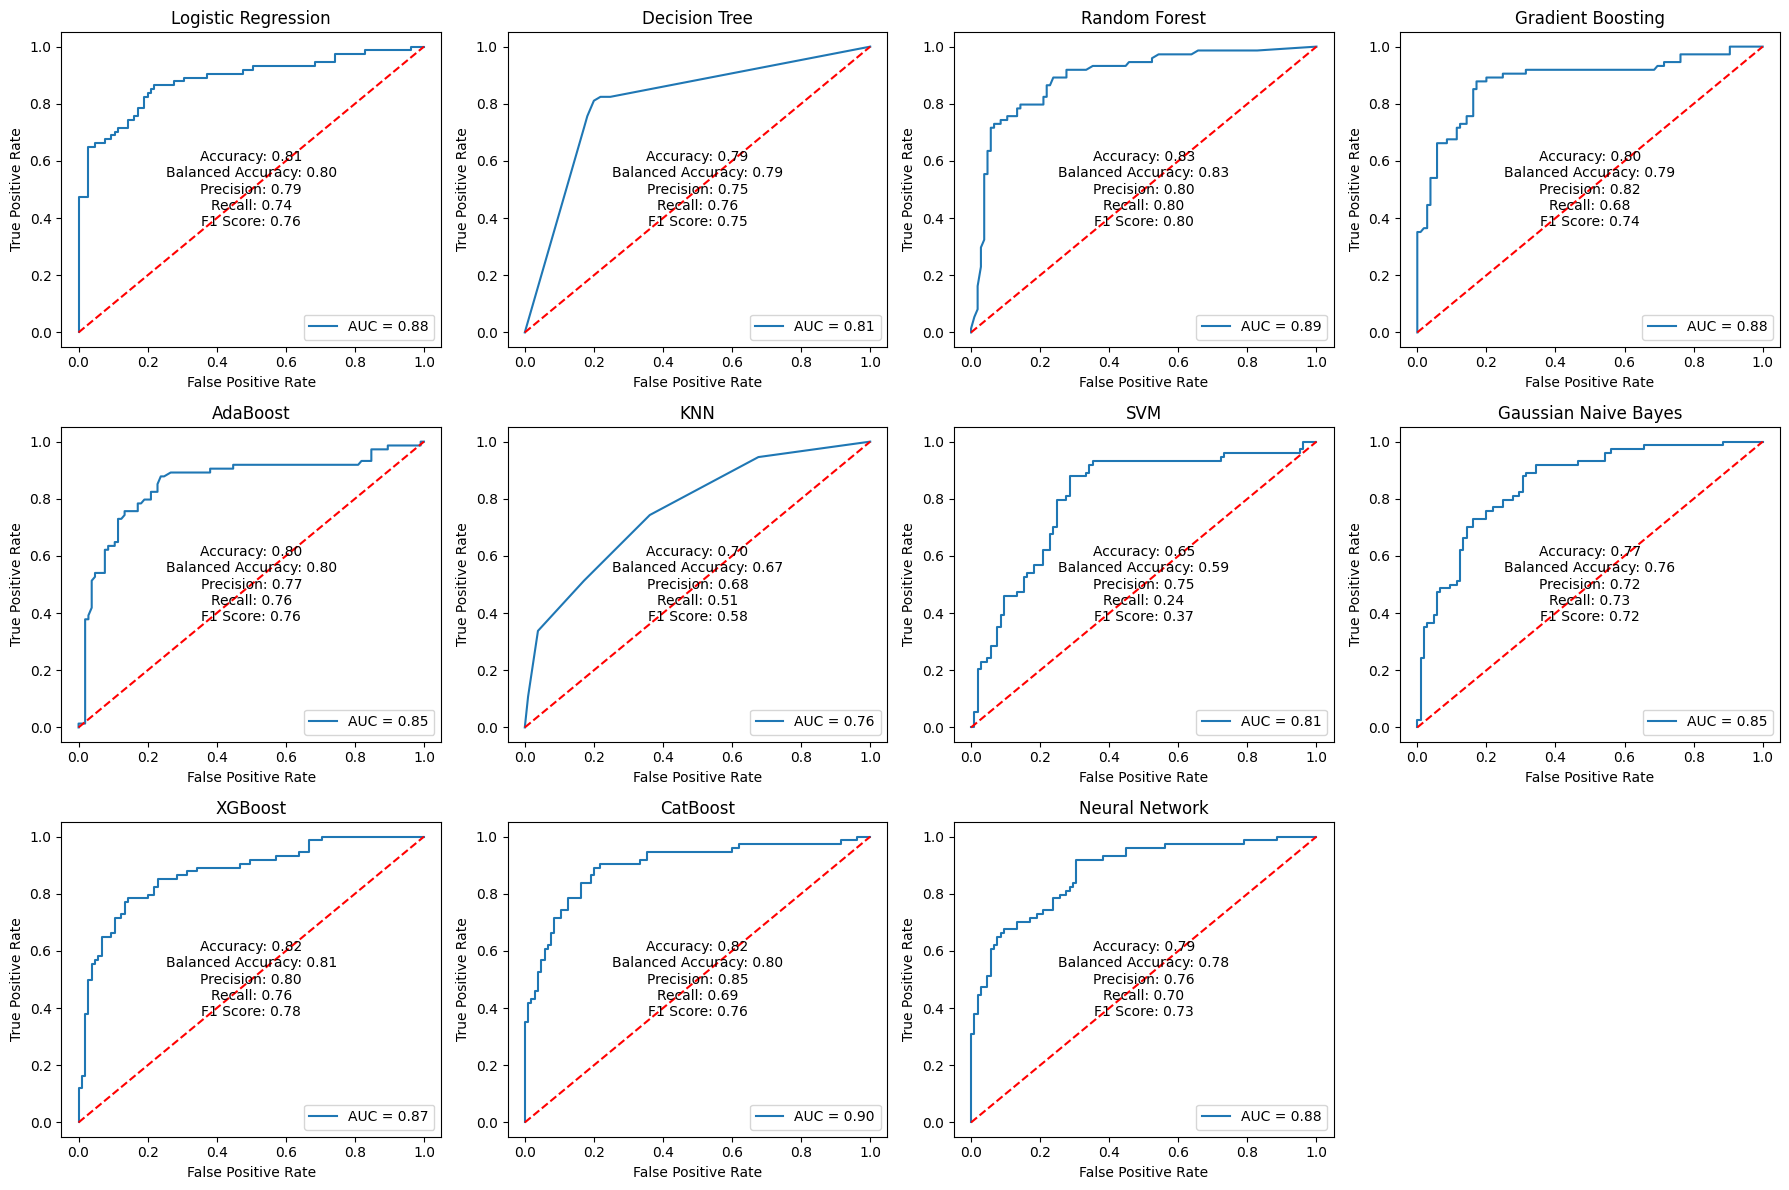

Tabela de Acurácia Classificada em Ordem Decrescente:
                      Accuracy  Rank
Classifier                          
Random Forest         0.832402     1
XGBoost               0.821229     2
CatBoost              0.821229     3
Logistic Regression   0.810056     4
Gradient Boosting     0.804469     5
AdaBoost              0.804469     6
Decision Tree         0.793296     7
Neural Network        0.787709     8
Gaussian Naive Bayes  0.770950     9
KNN                   0.698324    10
SVM                   0.653631    11


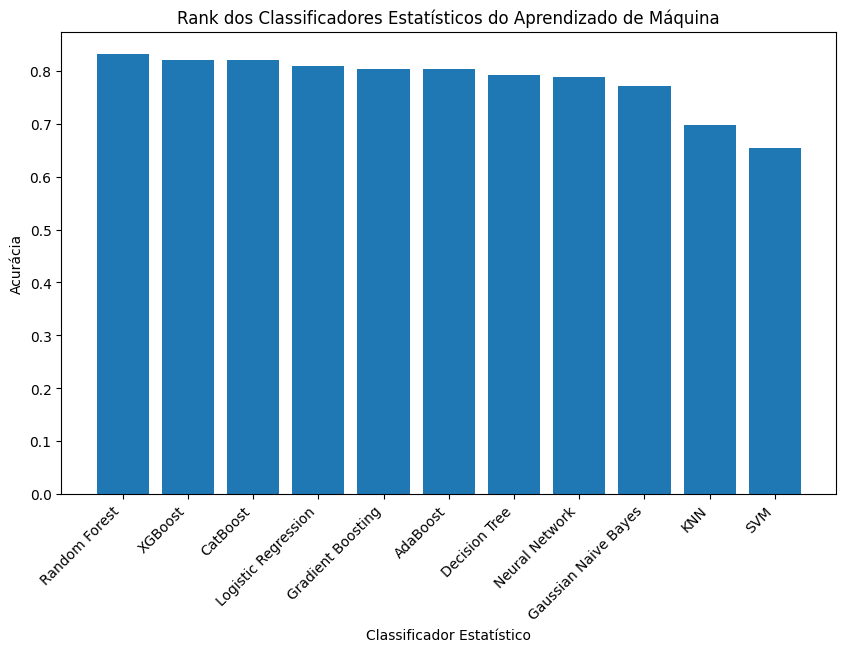

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Carregar o dataset do Titanic
print("Por favor, faça o uplod do arquivo CSV com os dados do Titanic:")
file = files.upload()
df = pd.read_csv("titanic.csv")

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os classificadores
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # Habilitar a probabilidade para a curva ROC
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Treinar e avaliar cada classificador
results = {}
plt.figure(figsize=(18, 12))
for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[clf_name] = accuracy

    # Calcular e plotar a curva ROC
    if hasattr(clf, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

        plt.subplot(3, 4, i)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.title(clf_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Criar tabela de acurácia classificada em ordem decrescente
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

# Exibir tabela de acurácia
df_results = pd.DataFrame.from_dict(sorted_results, orient='index', columns=['Accuracy'])
df_results['Rank'] = range(1, len(df_results) + 1)  # Adicionar coluna de rank
df_results.index.name = 'Classifier'
print("Tabela de Acurácia Classificada em Ordem Decrescente:")
print(df_results)

# Exibir gráfico de barras da acurácia dos classificadores
plt.figure(figsize=(10, 6))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.title('Rank dos Classificadores Estatísticos do Aprendizado de Máquina')
plt.xlabel('Classificador Estatístico')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')
plt.show()


#Melhorando a exibição das medidas de desempenho mostrando até 10 casas decimais após a vírguma para melhor observação das variações de um classificador para o outro da acurácia dos **11 classificadores**

Por favor, faça o uplod do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (34).csv


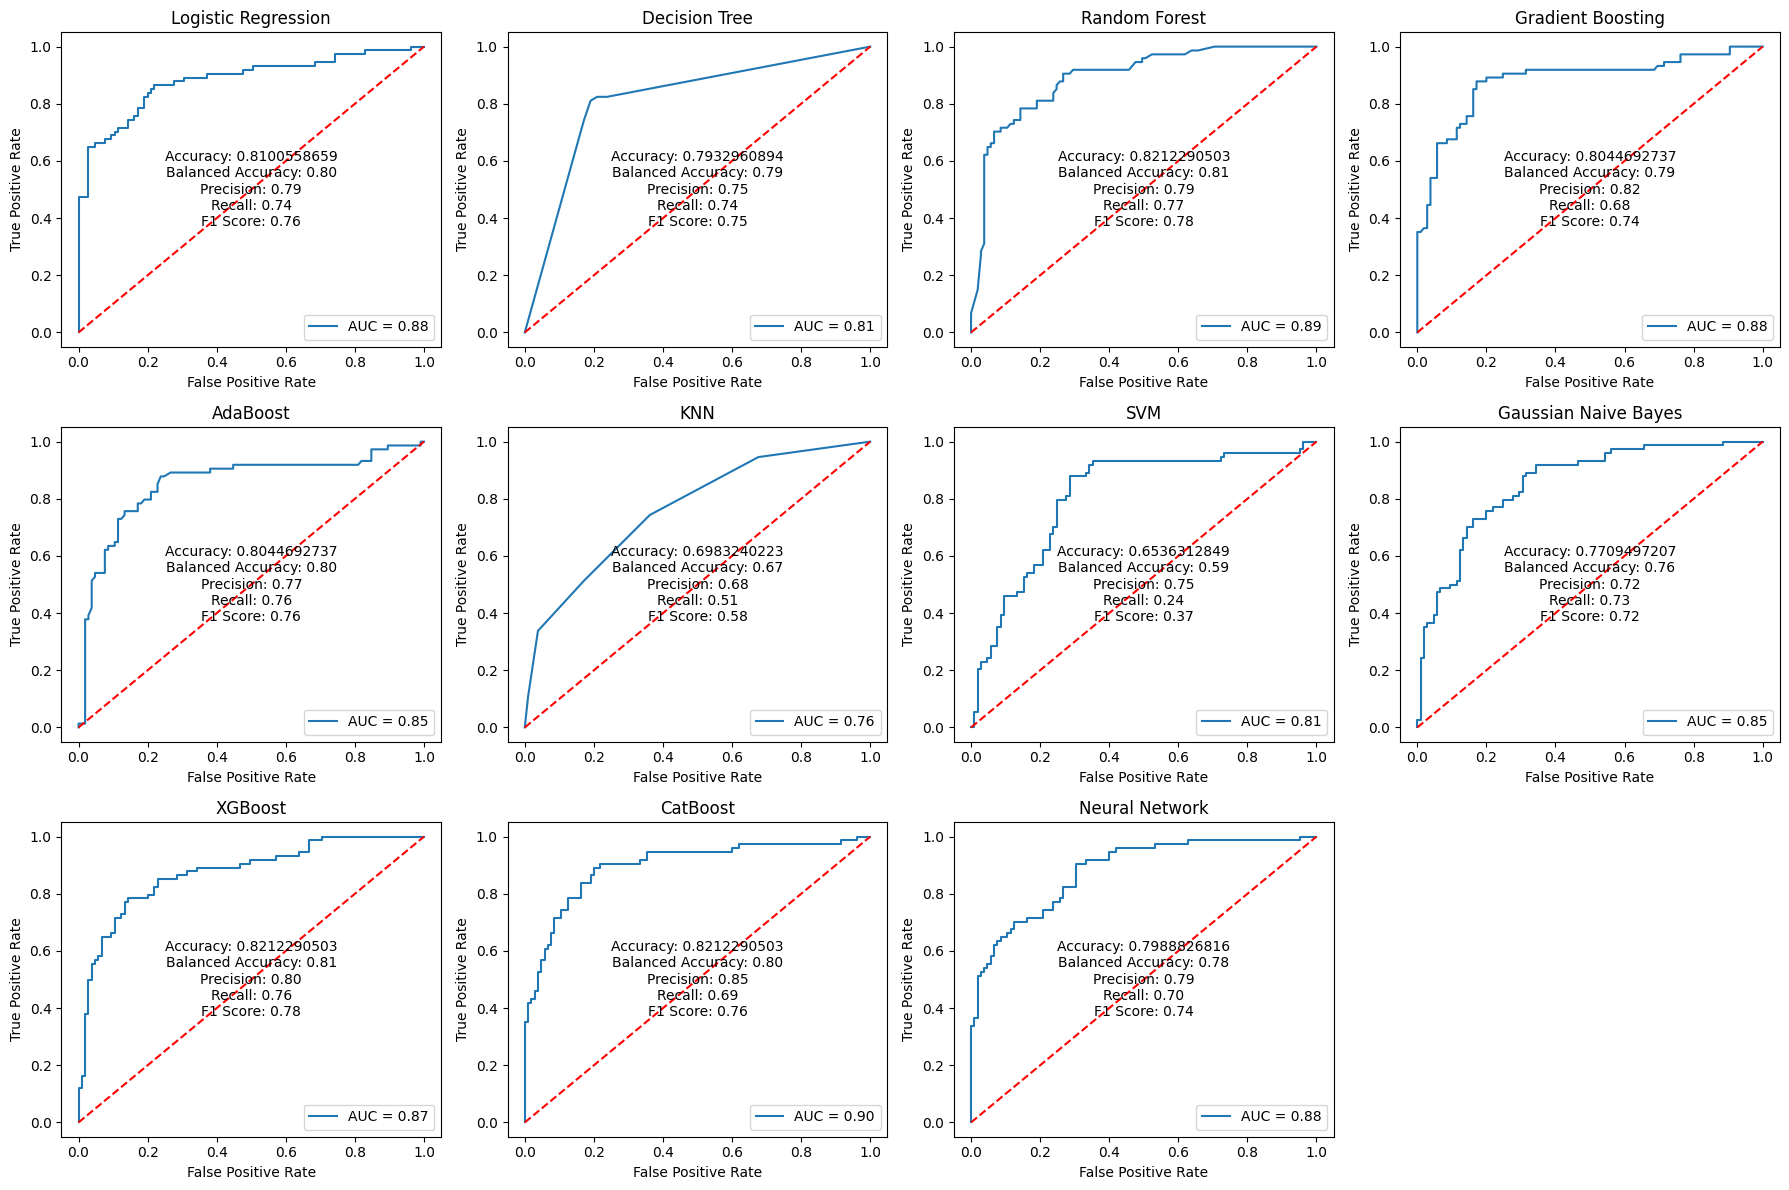

Tabela de Acurácia Classificada em Ordem Decrescente:
                      Accuracy  Rank
Classifier                          
Random Forest         0.821229     1
XGBoost               0.821229     2
CatBoost              0.821229     3
Logistic Regression   0.810056     4
Gradient Boosting     0.804469     5
AdaBoost              0.804469     6
Neural Network        0.798883     7
Decision Tree         0.793296     8
Gaussian Naive Bayes  0.770950     9
KNN                   0.698324    10
SVM                   0.653631    11


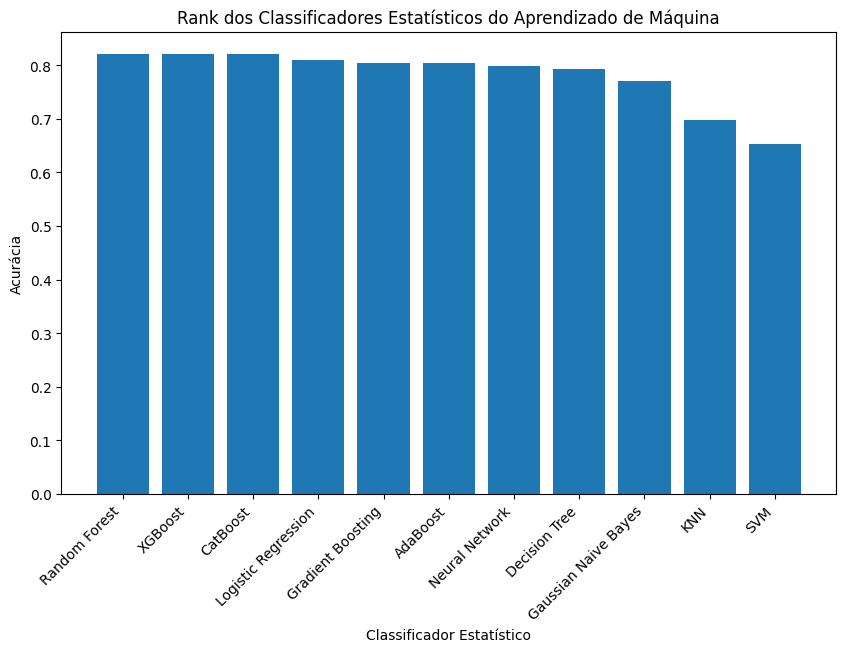

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Carregar o dataset do Titanic
print("Por favor, faça o uplod do arquivo CSV com os dados do Titanic:")
file = files.upload()
df = pd.read_csv("titanic.csv")

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os classificadores
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # Habilitar a probabilidade para a curva ROC
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Treinar e avaliar cada classificador
results = {}
plt.figure(figsize=(18, 12))
for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[clf_name] = accuracy

    # Calcular e plotar a curva ROC
    if hasattr(clf, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

        plt.subplot(3, 4, i)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.title(clf_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.10f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.10f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Criar tabela de acurácia classificada em ordem decrescente
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

# Exibir tabela de acurácia
df_results = pd.DataFrame.from_dict(sorted_results, orient='index', columns=['Accuracy'])
df_results['Rank'] = range(1, len(df_results) + 1)  # Adicionar coluna de rank
df_results.index.name = 'Classifier'
print("Tabela de Acurácia Classificada em Ordem Decrescente:")
print(df_results)

# Exibir gráfico de barras da acurácia dos classificadores
plt.figure(figsize=(10, 6))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.title('Rank dos Classificadores Estatísticos do Aprendizado de Máquina')
plt.xlabel('Classificador Estatístico')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')
plt.show()

#Exibindo agora na tabela de comparação a coluna com os valores do cálculo da AUC ao lado da coluna com os valores da acurácia para comparação entre os classificadores

#<font color=red>Este é o melhor algoritmo implementado para comparação do desempenho dos classificadores estatísticos no aprendizado de máquina

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (11).csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


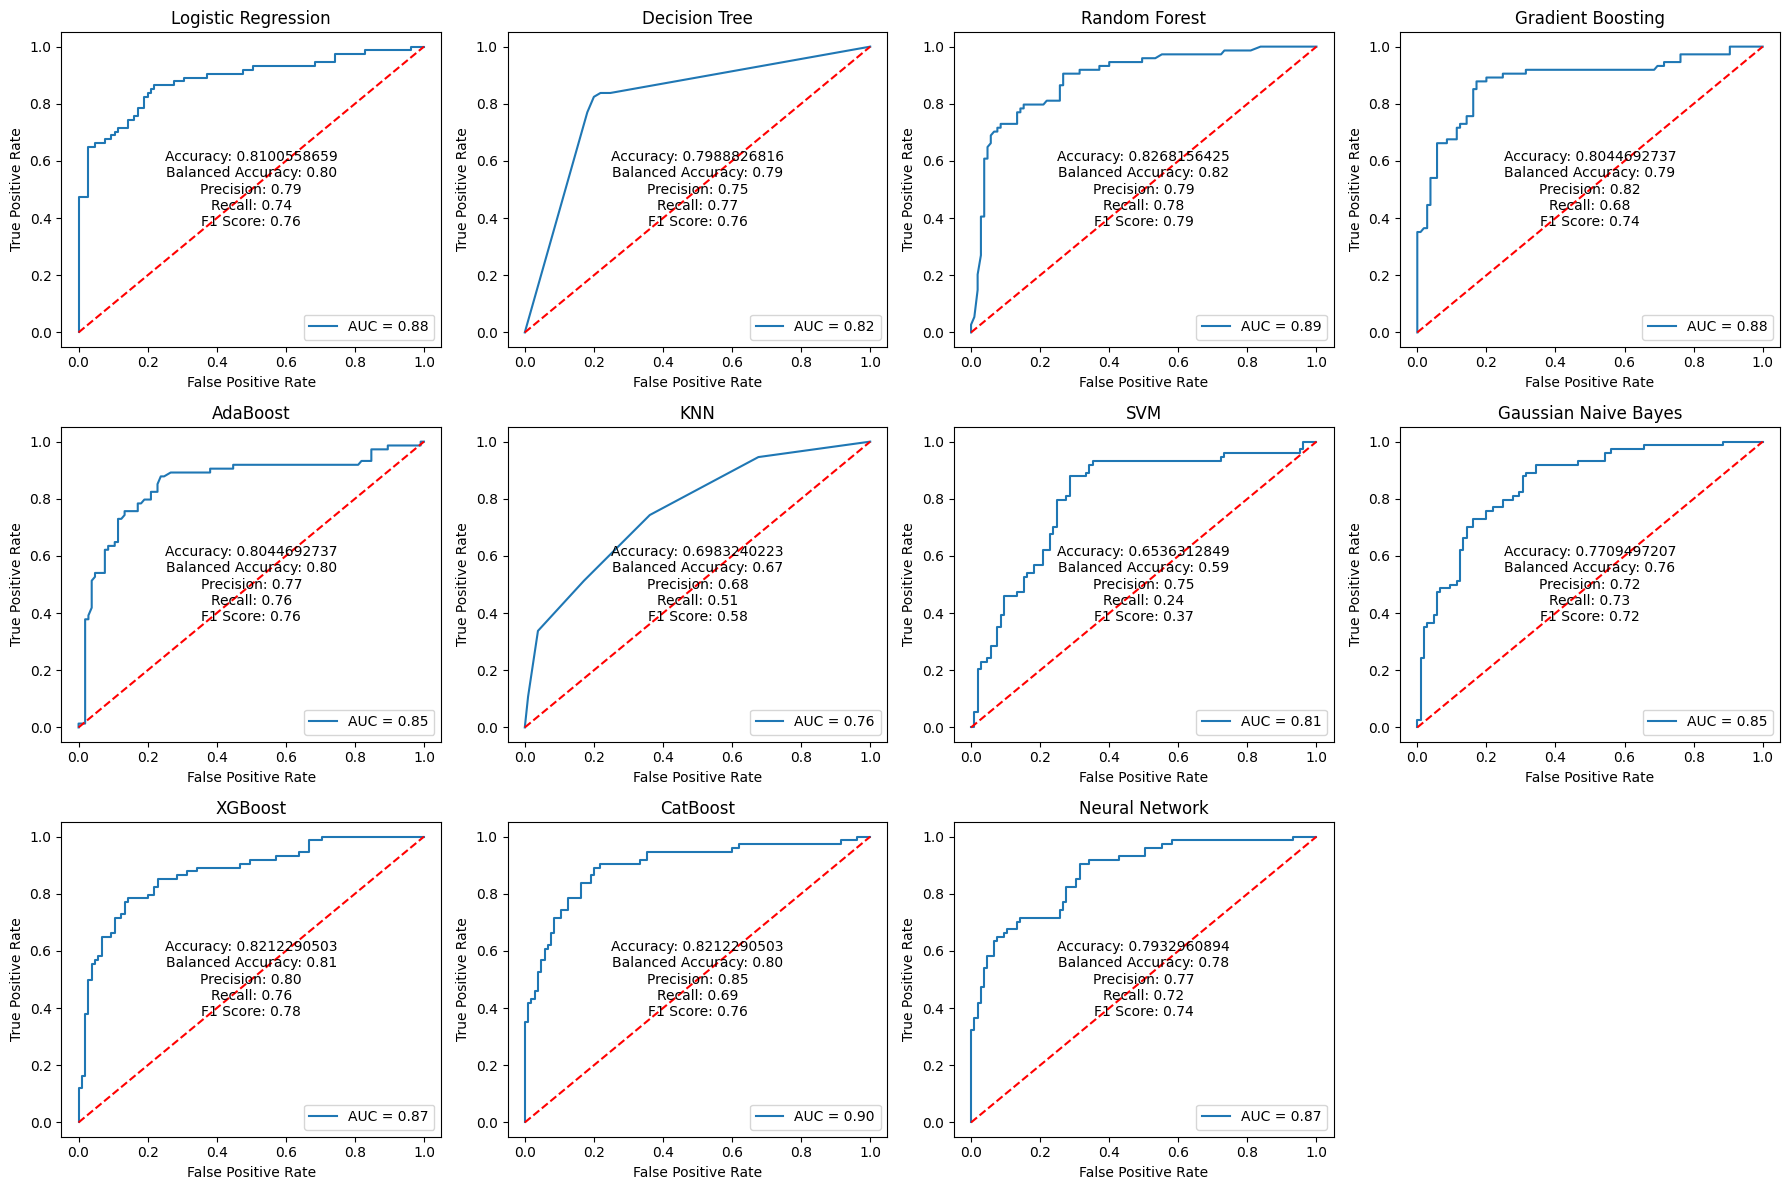

Tabela de Acurácia Classificada em Ordem Decrescente:
                      Accuracy       AUC  Rank
Classifier                                    
Random Forest         0.826816  0.890412     1
XGBoost               0.821229  0.874646     2
CatBoost              0.821229  0.896911     3
Logistic Regression   0.810056  0.882497     4
Gradient Boosting     0.804469  0.881338     5
AdaBoost              0.804469  0.854569     6
Decision Tree         0.798883  0.816023     7
Neural Network        0.793296  0.873359     8
Gaussian Naive Bayes  0.770950  0.854698     9
KNN                   0.698324  0.763835    10
SVM                   0.653631  0.807079    11


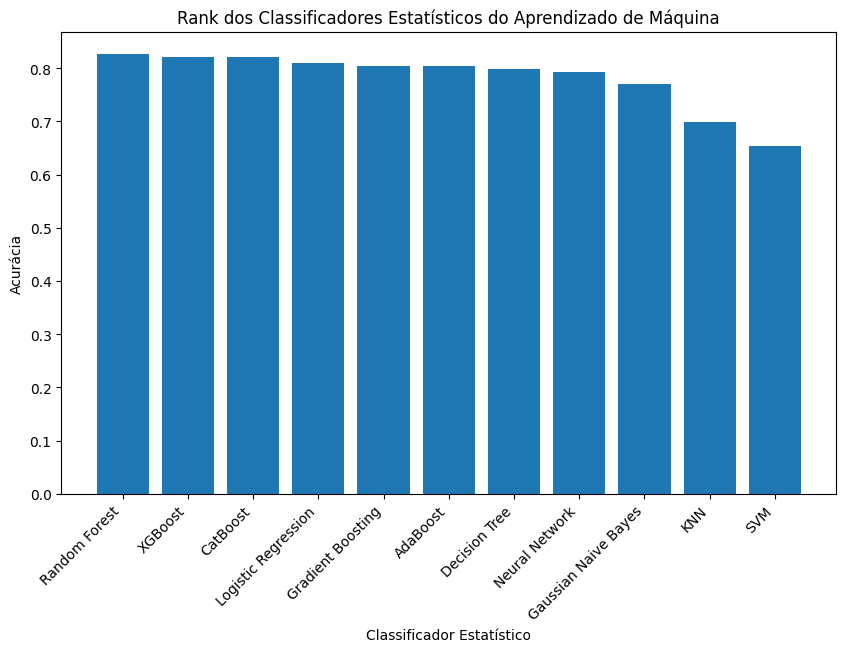

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from google.colab import files

# Carregar o dataset do Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
file = files.upload()
df = pd.read_csv("titanic.csv")

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os classificadores
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # Habilitar a probabilidade para a curva ROC
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Treinar e avaliar cada classificador
results = {}
auc_scores = {}
plt.figure(figsize=(18, 12))
for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[clf_name] = accuracy

    # Calcular e plotar a curva ROC
    if hasattr(clf, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        auc_scores[clf_name] = auc

        plt.subplot(3, 4, i)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='red')
        plt.title(clf_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.10f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        # Exibir métricas
        plt.text(0.5, 0.5, f'Accuracy: {accuracy:.10f}\nBalanced Accuracy: {balanced_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Criar tabela de acurácia classificada em ordem decrescente
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}
sorted_auc_scores = {k: auc_scores[k] for k in sorted_results.keys()}

# Exibir tabela de acurácia com valores de AUC
df_results = pd.DataFrame.from_dict(sorted_results, orient='index', columns=['Accuracy'])
df_results['AUC'] = sorted_auc_scores.values()
df_results['Rank'] = range(1, len(df_results) + 1)  # Adicionar coluna de rank
df_results.index.name = 'Classifier'
print("Tabela de Acurácia Classificada em Ordem Decrescente:")
print(df_results)

# Exibir gráfico de barras da acurácia dos classificadores
plt.figure(figsize=(10, 6))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.title('Rank dos Classificadores Estatísticos do Aprendizado de Máquina')
plt.xlabel('Classificador Estatístico')
plt.ylabel('Acurácia')
plt.xticks(rotation=45, ha='right')
plt.show()


##Foi observado então que para o dataset do Titanic, os três melhores classificadores estatísticos do aprendizado de máquina foram a Floresta Randômica, XGBoost e CatBoost com acurácia e AUC respectivamente para cada classificador de: 82,68 % e 0,89; 82,12 % e 0,87 e 82,12 % e 0,89

#Fazendo Novas Classificações Para Novos Passageiros

#Implementando agora um algoritmo que faz classificação para um único passeiro usando o melhor classificador estatístico (Floresta Randômica) encontrado no estudo acima  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Carregar o dataset do Titanic
df = pd.read_csv("titanic.csv")

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Prever se o passageiro sobreviverá
    survival_prediction = rf_classifier.predict(passenger_data)

    # Calcular a precisão da classificação
    predicted_prob = rf_classifier.predict_proba(passenger_data)
    accuracy = predicted_prob[0][survival_prediction[0]]

    # Exibir o resultado da previsão e a precisão
    if survival_prediction[0] == 1:
        print(f"\033[92m{name} provavelmente sobreviverá a um possível acidente com o Titanic.\033[0m")  # Verde
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá a um possível acidente com o Titanic.\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação é de {accuracy:.2f}.\033[0m")  # Amarelo

# Chamar a função para prever a sobrevivência
predict_survival()


Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
Wagner provavelmente não sobreviverá a um possível acidente com o Titanic.
A precisão da classificação é de 0.91.


#A diferênça é que neste novo algoritmo o arquivo .CSV é solicitado ao usuário por meio da biblioteca Google Colab File permitindo um simples front-end de interação com o usuário

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Prever se o passageiro sobreviverá
    survival_prediction = rf_classifier.predict(passenger_data)

    # Calcular a precisão da classificação
    predicted_prob = rf_classifier.predict_proba(passenger_data)
    accuracy = predicted_prob[0][survival_prediction[0]]

    # Exibir o resultado da previsão e a precisão
    if survival_prediction[0] == 1:
        print(f"\033[92m{name} provavelmente sobreviverá a um possível acidente com o Titanic.\033[0m")  # Verde
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá a um possível acidente com o Titanic.\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação é de {accuracy:.2f}.\033[0m")  # Amarelo

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (12).csv
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
Wagner provavelmente não sobreviverá a um possível acidente com o Titanic.
A precisão da classificação é de 0.88.


#Implementando agora o algoritmo usando os três melhores classificadores Floresta Randômica, XG Boost e Cat Boost para um único novo passageiro

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Treinar o modelo XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X, y)

# Treinar o modelo CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X, y)

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Prever se o passageiro sobreviverá usando o modelo Random Forest
    rf_survival_prediction = rf_classifier.predict(passenger_data)
    rf_predicted_prob = rf_classifier.predict_proba(passenger_data)
    rf_accuracy = rf_predicted_prob[0][rf_survival_prediction[0]]

    # Prever se o passageiro sobreviverá usando o modelo XGBoost
    xgb_survival_prediction = xgb_classifier.predict(passenger_data)
    xgb_predicted_prob = xgb_classifier.predict_proba(passenger_data)
    xgb_accuracy = xgb_predicted_prob[0][xgb_survival_prediction[0]]

    # Prever se o passageiro sobreviverá usando o modelo CatBoost
    catboost_survival_prediction = catboost_classifier.predict(passenger_data)
    catboost_predicted_prob = catboost_classifier.predict_proba(passenger_data)
    catboost_accuracy = catboost_predicted_prob[0][catboost_survival_prediction[0]]

    # Exibir o resultado da previsão e a precisão para Random Forest
    if rf_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá (Random Forest).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá (Random Forest).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (Random Forest) é de {rf_accuracy:.2f}.\033[0m")  # Amarelo

    # Exibir o resultado da previsão e a precisão para XGBoost
    if xgb_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá (XGBoost).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá (XGBoost).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (XGBoost) é de {xgb_accuracy:.2f}.\033[0m")  # Amarelo

    # Exibir o resultado da previsão e a precisão para CatBoost
    if catboost_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá (CatBoost).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá (CatBoost).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (CatBoost) é de {catboost_accuracy:.2f}.\033[0m")  # Amarelo

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (13).csv
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
Wagner provavelmente não sobreviverá (Random Forest).
A precisão da classificação (Random Forest) é de 0.89.
Wagner provavelmente não sobreviverá (XGBoost).
A precisão da classificação (XGBoost) é de 0.90.
Wagner provavelmente não sobreviverá (CatBoost).
A precisão da classificação (CatBoost) é de 0.66.


#Para um outro novo passageiro

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Treinar o modelo XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X, y)

# Treinar o modelo CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X, y)

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Prever se o passageiro sobreviverá usando o modelo Random Forest
    rf_survival_prediction = rf_classifier.predict(passenger_data)
    rf_predicted_prob = rf_classifier.predict_proba(passenger_data)
    rf_accuracy = rf_predicted_prob[0][rf_survival_prediction[0]]

    # Prever se o passageiro sobreviverá usando o modelo XGBoost
    xgb_survival_prediction = xgb_classifier.predict(passenger_data)
    xgb_predicted_prob = xgb_classifier.predict_proba(passenger_data)
    xgb_accuracy = xgb_predicted_prob[0][xgb_survival_prediction[0]]

    # Prever se o passageiro sobreviverá usando o modelo CatBoost
    catboost_survival_prediction = catboost_classifier.predict(passenger_data)
    catboost_predicted_prob = catboost_classifier.predict_proba(passenger_data)
    catboost_accuracy = catboost_predicted_prob[0][catboost_survival_prediction[0]]

    # Exibir o resultado da previsão e a precisão para Random Forest
    if rf_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá a um possível acidente com o Titanic. (Random Forest).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá a um possível acidente com o Titanic. (Random Forest).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (Random Forest) é de {rf_accuracy:.2f}.\033[0m")  # Amarelo

    # Exibir o resultado da previsão e a precisão para XGBoost
    if xgb_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá a um possível acidente com o Titanic. (XGBoost).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá a um possível acidente com o Titanic. (XGBoost).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (XGBoost) é de {xgb_accuracy:.2f}.\033[0m")  # Amarelo

    # Exibir o resultado da previsão e a precisão para CatBoost
    if catboost_survival_prediction[0] == 1:
        print(f"\033[91m{name} provavelmente sobreviverá a um possível acidente com o Titanic. (CatBoost).\033[0m")  # Vermelho
    else:
        print(f"\033[91m{name} provavelmente não sobreviverá a um possível acidente com o Titanic. (CatBoost).\033[0m")  # Vermelho
    print(f"\033[93mA precisão da classificação (CatBoost) é de {catboost_accuracy:.2f}.\033[0m")  # Amarelo

# Chamar a função para prever a sobrevivência
predict_survival()

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (15).csv
Digite o nome do passageiro: Rose
Digite a idade do passageiro: 55
Digite o sexo do passageiro (male/female): female
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
Rose provavelmente sobreviverá a um possível acidente com o Titanic. (Random Forest).
A precisão da classificação (Random Forest) é de 1.00.
Rose provavelmente sobreviverá a um possível acidente com o Titanic. (XGBoost).
A precisão da classificação (XGBoost) é de 0.99.
Rose provavelmente sobreviverá a um possível acidente com o Titanic. (CatBoost).
A precisão da classificação (CatBoost) é de 0.95.


#Neste algoritmo permite ao usuário entrar com N passageiros onde inicialmente o algoritmo solicita ao usuário a quantidade de novos passageiros e faz a classificação de sobrevivência ou não feita pelos três melhores classificadores

#<font color=red>Melhor Algoritmo Implementado Para Classificação de N Passageiros Feito Pelos Três Melhores Classificadores Estatísticos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Treinar o modelo XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X, y)

# Treinar o modelo CatBoost
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X, y)

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    num_passengers = int(input("Digite o número de passageiros que deseja classificar: "))
    for i in range(num_passengers):
        print(f"\nInformações do Passageiro {i+1}:")
        name = input("Nome: ")
        age = float(input("Idade: "))
        sex = input("Sexo (male/female): ")
        sex = label_encoders['Sex'].transform([sex])[0]
        print("Locais de embarque:")
        print("1. Southampton")
        print("2. Cherbourg")
        print("3. Queenstown")
        embarked = int(input("Local de embarque (1/2/3): ")) - 1
        pclass = int(input("Classe (1/2/3): "))

        # Criar um DataFrame com os dados do passageiro
        passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                       columns=['Pclass', 'Sex', 'Age', 'Embarked'])

        # Prever se o passageiro sobreviverá usando o modelo Random Forest
        rf_survival_prediction = rf_classifier.predict(passenger_data)
        rf_predicted_prob = rf_classifier.predict_proba(passenger_data)
        rf_accuracy = rf_predicted_prob[0][rf_survival_prediction[0]]

        # Prever se o passageiro sobreviverá usando o modelo XGBoost
        xgb_survival_prediction = xgb_classifier.predict(passenger_data)
        xgb_predicted_prob = xgb_classifier.predict_proba(passenger_data)
        xgb_accuracy = xgb_predicted_prob[0][xgb_survival_prediction[0]]

        # Prever se o passageiro sobreviverá usando o modelo CatBoost
        catboost_survival_prediction = catboost_classifier.predict(passenger_data)
        catboost_predicted_prob = catboost_classifier.predict_proba(passenger_data)
        catboost_accuracy = catboost_predicted_prob[0][catboost_survival_prediction[0]]

        # Exibir o resultado da previsão e a precisão para Random Forest
        if rf_survival_prediction[0] == 1:
            print(f"\033[91m{name} provavelmente sobreviverá ao acidente com o Titanic. (Random Forest).\033[0m")  # Vermelho
        else:
            print(f"\033[91m{name} provavelmente não sobreviverá ao acidente com o Titanic. (Random Forest).\033[0m")  # Vermelho
        print(f"\033[93mA precisão da classificação (Random Forest) é de {rf_accuracy:.2f}.\033[0m")  # Amarelo

        # Exibir o resultado da previsão e a precisão para XGBoost
        if xgb_survival_prediction[0] == 1:
            print(f"\033[91m{name} provavelmente sobreviverá ao acidente com o Titanic. (XGBoost).\033[0m")  # Vermelho
        else:
            print(f"\033[91m{name} provavelmente não sobreviverá ao acidente com o Titanic. (XGBoost).\033[0m")  # Vermelho
        print(f"\033[93mA precisão da classificação (XGBoost) é de {xgb_accuracy:.2f}.\033[0m")  # Amarelo

        # Exibir o resultado da previsão e a precisão para CatBoost
        if catboost_survival_prediction[0] == 1:
            print(f"\033[91m{name} provavelmente sobreviverá ao acidente com o Titanic. (CatBoost).\033[0m")  # Vermelho
        else:
            print(f"\033[91m{name} provavelmente não sobreviverá ao acidente com o Titanic. (CatBoost).\033[0m")  # Vermelho
        print(f"\033[93mA precisão da classificação (CatBoost) é de {catboost_accuracy:.2f}.\033[0m")  # Amarelo

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (23).csv
Digite o número de passageiros que deseja classificar: 3

Informações do Passageiro 1:
Nome: Wagner
Idade: 51
Sexo (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Local de embarque (1/2/3): 1
Classe (1/2/3): 1
Wagner provavelmente não sobreviverá ao acidente com o Titanic. (Random Forest).
A precisão da classificação (Random Forest) é de 0.91.
Wagner provavelmente não sobreviverá ao acidente com o Titanic. (XGBoost).
A precisão da classificação (XGBoost) é de 0.90.
Wagner provavelmente não sobreviverá ao acidente com o Titanic. (CatBoost).
A precisão da classificação (CatBoost) é de 0.66.

Informações do Passageiro 2:
Nome: Rose
Idade: 55
Sexo (male/female): female
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Local de embarque (1/2/3): 1
Classe (1/2/3): 1
Rose provavelmente sobreviverá ao acidente com o Titanic. (Random Forest).
A precisão da classificação (Random Forest) é de 0.97.
Rose provavelm

#Implementando Uma Rede Neural Artificial MLP Para o Cenário do Titanic

##No código fornecido, é implementado uma rede neural sequencial simples (perceptron de múltiplas camadas) com duas camadas intermediárias com a seguinte descrição:

* Arquitetura da Rede Neural: Rede Neural Sequencial

* Quantidade de Camadas Intermediárias: 2 camadas

* Quantidade de Neurônios em Cada Camada Intermediária: primeira camada intermediária com 64 neurônios e segunda camada intermediária com 32 neurônios

##A rede neural sequencial utilizada não possui um nome específico além de "rede neural sequencial". Neste algoritmo, trata-se de uma arquitetura simples de rede neural artificial, onde as camadas são empilhadas sequencialmente uma após a outra. Este é um dos modelos mais básicos e comuns de redes neurais utilizados em problemas de classificação.

##Com tudo, esta rede neural sequencial implementada pode ser considerada um tipo de perceptron de múltiplas camadas (MLP - Multi-Layer Perceptron). Um MLP consiste em uma rede neural com múltiplas camadas intermediárias entre a camada de entrada e a camada de saída. No algoritmo implementado, a rede neural sequencial é construída utilizando a biblioteca Keras/TensorFlow, e é composta por várias camadas densas (fully connected), o que a caracteriza como um MLP.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from termcolor import colored
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Avaliar o modelo
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(colored(f"Acurácia da Rede Neural: {accuracy:.2f}", "yellow"))

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Padronizar os dados
    passenger_data_scaled = scaler.transform(passenger_data)

    # Prever se o passageiro sobreviverá
    survival_prediction = model.predict(passenger_data_scaled)[0][0]
    if survival_prediction >= 0.5:
        print(colored(f"{name} provavelmente sobreviverá.", "red"))
    else:
        print(colored(f"{name} provavelmente não sobreviverá.", "red"))

    # Exibir a precisão da previsão
    print(colored(f"Precisão da previsão: {survival_prediction:.2f}", "yellow"))

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (18).csv
6/6 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.7989
Acurácia da Rede Neural: 0.80
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
1/1 [==============================] - 0s 66ms/step
Wagner provavelmente não sobreviverá.
Precisão da previsão: 0.38


#Aumentando a densidade da rede neural artificial para mais 1 camada intermediária com 128 neurônios e para 100 épocas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from termcolor import colored
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Avaliar o modelo
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(colored(f"Acurácia da Rede Neural: {accuracy:.2f}", "yellow"))

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Padronizar os dados
    passenger_data_scaled = scaler.transform(passenger_data)

    # Prever se o passageiro sobreviverá
    survival_prediction = model.predict(passenger_data_scaled)[0][0]
    if survival_prediction >= 0.5:
        print(colored(f"{name} provavelmente sobreviverá.", "red"))
    else:
        print(colored(f"{name} provavelmente não sobreviverá.", "red"))

    # Exibir a precisão da previsão
    print(colored(f"Precisão da previsão: {survival_prediction:.2f}", "yellow"))

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (19).csv
6/6 [==============================] - 1s 8ms/step - loss: 0.5433 - accuracy: 0.7821
Acurácia da Rede Neural: 0.78
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
1/1 [==============================] - 0s 71ms/step
Wagner provavelmente não sobreviverá.
Precisão da previsão: 0.41


#Aumentando mais ainda a densidade da rede neural artificial para mais uma 1 camada com 64 neurônios, mais uma camada com 128 neurônios e mais uma camada com 256 neurônios e permanecendo as 100 épocas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from termcolor import colored
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Avaliar o modelo
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(colored(f"Acurácia da Rede Neural: {accuracy:.2f}", "yellow"))

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Padronizar os dados
    passenger_data_scaled = scaler.transform(passenger_data)

    # Prever se o passageiro sobreviverá
    survival_prediction = model.predict(passenger_data_scaled)[0][0]
    if survival_prediction >= 0.5:
        print(colored(f"{name} provavelmente sobreviverá.", "red"))
    else:
        print(colored(f"{name} provavelmente não sobreviverá.", "red"))

    # Exibir a precisão da previsão
    print(colored(f"Precisão da previsão: {survival_prediction:.2f}", "yellow"))

# Chamar a função para prever a sobrevivência
predict_survival()


Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (20).csv
6/6 [==============================] - 0s 4ms/step - loss: 0.5820 - accuracy: 0.7654
Acurácia da Rede Neural: 0.77
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
1/1 [==============================] - 0s 155ms/step
Wagner provavelmente não sobreviverá.
Precisão da previsão: 0.45


#Aumentando mais 1 camada intermediária com 32 neurônios e com 200 épocas, sendo agora:

* 256 neurônios

* 128 neurônios

* 128 neurônios

* 64 neurônios

* 64 neurônios

* 32 neurônios

* 32 neurônios

* 1 neurônios

##Exibindo a curva do treinamento acurácia X épocas

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (21).csv
6/6 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.7933
Acurácia da Rede Neural: 0.79
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1


1/1 [==============================] - 0s 120ms/step
Wagner provavelmente não sobreviverá.
Precisão da previsão: 0.47


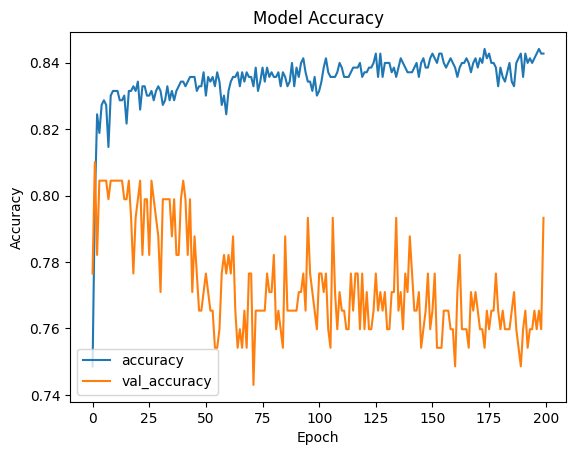

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from termcolor import colored
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Avaliar o modelo
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(colored(f"Acurácia da Rede Neural: {accuracy:.2f}", "yellow"))

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Padronizar os dados
    passenger_data_scaled = scaler.transform(passenger_data)

    # Prever se o passageiro sobreviverá
    survival_prediction = model.predict(passenger_data_scaled)[0][0]
    if survival_prediction >= 0.5:
        print(colored(f"{name} provavelmente sobreviverá.", "red"))
    else:
        print(colored(f"{name} provavelmente não sobreviverá.", "red"))

    # Exibir a precisão da previsão
    print(colored(f"Precisão da previsão: {survival_prediction:.2f}", "yellow"))

# Chamar a função para prever a sobrevivência
predict_survival()

# Exibir o gráfico de aprendizado da rede neural
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#A mesma arquitetura da rede neural artificial acima com a implementação da técnica de regulrização L2 Regularization com penalidade 0,01 (Ridge Regression)

##Com a exibição na tela da curva ROC com o cálculo da AUC

Por favor, faça o upload do arquivo CSV com os dados do Titanic:


Saving titanic.csv to titanic (24).csv
6/6 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7989
Acurácia da Rede Neural: 0.80
Digite o nome do passageiro: Wagner
Digite a idade do passageiro: 51
Digite o sexo do passageiro (male/female): male
Locais de embarque:
1. Southampton
2. Cherbourg
3. Queenstown
Escolha o local de embarque (1/2/3): 1
Digite a classe do passageiro (1/2/3): 1
1/1 [==============================] - 0s 109ms/step
Wagner provavelmente não sobreviverá.
Precisão da previsão: 0.35


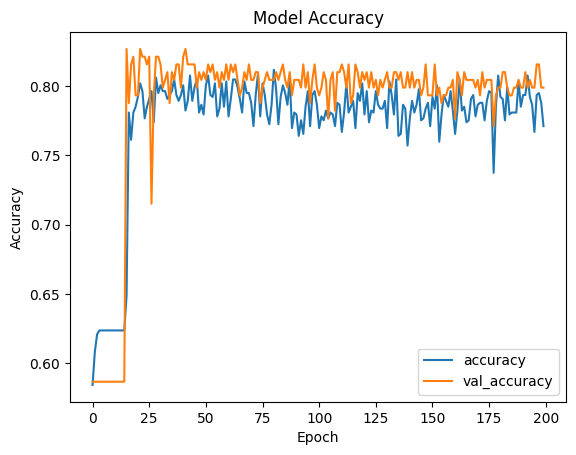

6/6 [==============================] - 0s 3ms/step


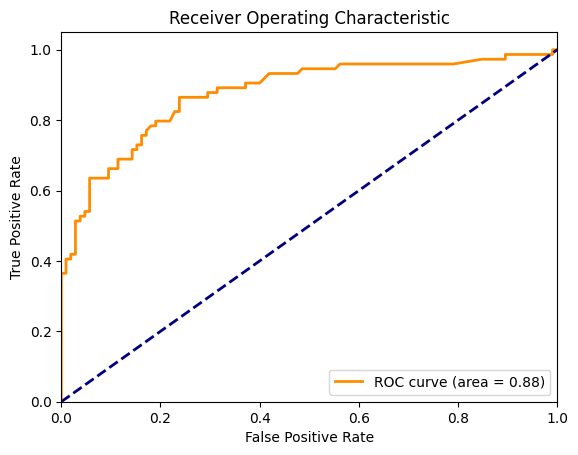

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from termcolor import colored
from google.colab import files

# Solicitar o arquivo CSV do dataset Titanic
print("Por favor, faça o upload do arquivo CSV com os dados do Titanic:")
uploaded = files.upload()

# Carregar o dataset do Titanic
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

# Remover colunas irrelevantes para a modelagem
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Parch', 'SibSp', 'Name'], axis=1, inplace=True)

# Lidar com valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converter variáveis categóricas em variáveis numéricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Avaliar o modelo
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(colored(f"Acurácia da Rede Neural: {accuracy:.2f}", "yellow"))

# Função para prever a sobrevivência de um passageiro
def predict_survival():
    name = input("Digite o nome do passageiro: ")
    age = float(input("Digite a idade do passageiro: "))
    sex = input("Digite o sexo do passageiro (male/female): ")
    sex = label_encoders['Sex'].transform([sex])[0]
    print("Locais de embarque:")
    print("1. Southampton")
    print("2. Cherbourg")
    print("3. Queenstown")
    embarked = int(input("Escolha o local de embarque (1/2/3): ")) - 1
    pclass = int(input("Digite a classe do passageiro (1/2/3): "))

    # Criar um DataFrame com os dados do passageiro
    passenger_data = pd.DataFrame([[pclass, sex, age, embarked]],
                                   columns=['Pclass', 'Sex', 'Age', 'Embarked'])

    # Padronizar os dados
    passenger_data_scaled = scaler.transform(passenger_data)

    # Prever se o passageiro sobreviverá
    survival_prediction = model.predict(passenger_data_scaled)[0][0]
    if survival_prediction >= 0.5:
        print(colored(f"{name} provavelmente sobreviverá.", "red"))
    else:
        print(colored(f"{name} provavelmente não sobreviverá.", "red"))

    # Exibir a precisão da previsão
    print(colored(f"Precisão da previsão: {survival_prediction:.2f}", "yellow"))

# Chamar a função para prever a sobrevivência
predict_survival()

# Exibir o gráfico de ganho e perda da rede neural
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Exibir o gráfico ROC
y_pred = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#Conclusões das Análises dos Dados dos Classificadores do Aprendizado Estatístico e das Novas Classificações de Sobrevivência Para Novos Passageiros do Titanic

##Podemos fazer alguns questionamentos para sobrevivência em relação a classe de passageiros, ao sexo e a idade

* quais são então os melhores insights?

* A clusterização nos mostrou bons resultados ou foi melhor usar os classificadores estatísticos do aprendizado de máquina?

* E qual foram os melhores classificadores estatísticos do aprendizado de máquina e por que?

* Porque houve variação na acurácia para classificação feita pelos 11 classificadores estatísticos do aprendizado de máquina usados para este dataset do titanic?

##Com base nas análises realizadas até agora com o dataset do Titanic, podemos tirar algumas conclusões e insights

* A sobrevivência em relação à classe de passageiros, os passageiros da primeira classe tiveram uma maior taxa de sobrevivência em comparação com os das classes inferiores. Isso sugere uma possível correlação entre classe socioeconômica e sobrevivência.

* A sobrevivência em relação ao sexo, as mulheres tiveram uma taxa de sobrevivência muito maior do que homens. Isso reflete a política de "mulheres e crianças primeiro" seguida durante o naufrágio.

* A sobrevivência em relação à idade, as crianças tiveram uma taxa de sobrevivência ligeiramente maior do que adultos. No entanto, a idade não foi o fator mais determinante para a sobrevivência.

* Comparando a clusterização vs. classificadores estatísticos, temos que a clusterização pode nos fornecer insights sobre a estrutura subjacente dos dados e identificar grupos naturais de passageiros com características semelhantes. No entanto, os classificadores estatísticos do aprendizado de máquina podem ser mais adequados para prever a sobrevivência de passageiros com base em uma variedade de características.
A escolha entre clusterização e classificadores estatísticos depende dos objetivos da análise e da natureza dos dados. Para explorar a estrutura dos dados e identificar grupos naturais, a clusterização pode ser útil. Por outro lado, se o objetivo é prever a sobrevivência com base em características específicas, os classificadores estatísticos podem ser mais apropriados.

* Observando os resultados numéricos dos melhores classificadores estatísticos, a eficiência dos classificadores estatísticos pode variar com base na natureza dos dados e nas características selecionadas para a análise. No entanto, alguns classificadores comumente usados, como Floresta Randômica, XG Boost e Cat Boost, foram os três primeiros no ranking apresentando as três melhores medidas de desempenho e melhores curvas ROC e valores para AUC, logo, com melhores resultados para as classificações de novos passageiros em função dos dados do dataset usados para treino.
A variação na acurácia dos classificadores pode ser atribuída a diferentes fatores, como a qualidade e quantidade dos dados, a seleção de características, os hiperparâmetros dos modelos e até mesmo a aleatoriedade inerente aos algoritmos de aprendizado de máquina.

#Vamos analisar mais detalhadamente os classificadores estatísticos do aprendizado de máquina

* Floresta Randômica (Random Forest): Com uma acurácia de cerca de 82.68% e uma AUC (Área Sob a Curva ROC) de aproximadamente 0.89, o Random Forest se destaca por sua capacidade de construir várias árvores de decisão durante o treinamento e combinar suas previsões para melhorar a precisão e evitar overfitting.

* XGBoost: Com uma acurácia de cerca de 82.12% e uma AUC de aproximadamente 0.87, o XGBoost é um algoritmo de boosting que utiliza árvores de decisão como base. Ele é conhecido por sua eficiência computacional e sua habilidade de lidar com grandes conjuntos de dados.

* CatBoost: O CatBoost obteve uma acurácia de cerca de 82.12% e uma AUC de aproximadamente 0.90. Ele é semelhante ao XGBoost, mas possui recursos adicionais para lidar com variáveis categóricas e tende a exigir menos ajustes de hiperparâmetros.

* Regressão Logística: Com uma acurácia de cerca de 81.01% e uma AUC de aproximadamente 0.88, a regressão logística é um modelo linear utilizado principalmente para classificação binária. Ele estima as probabilidades associadas às diferentes classes utilizando a função logística.

* Gradient Boosting: Com uma acurácia de cerca de 80.45% e uma AUC de aproximadamente 0.88, o Gradient Boosting é um método de boosting que constrói árvores de decisão sequencialmente, corrigindo os erros dos modelos anteriores.

* AdaBoost: Apresentando uma acurácia de cerca de 80.45% e uma AUC de aproximadamente 0.85, o AdaBoost é um algoritmo de boosting que atribui pesos maiores às instâncias mal classificadas em cada iteração, focando em melhorar o desempenho nessas instâncias.

* Árvore de Decisão: Com uma acurácia de cerca de 79.89% e uma AUC de aproximadamente 0.82, a árvore de decisão é um modelo simples e interpretável que divide os dados em subconjuntos cada vez mais homogêneos com base em variáveis de entrada.

* Rede Neural Artifical: Com uma acurácia de cerca de 79.33% e uma AUC de aproximadamente 0.87, as redes neurais são modelos de aprendizado profundo compostos por várias camadas de neurônios. Eles são capazes de aprender representações complexas dos dados.

* Naive Bayes Gaussiano: Com uma acurácia de cerca de 77.10% e uma AUC de aproximadamente 0.85, o Naive Bayes Gaussiano é um classificador probabilístico baseado no teorema de Bayes com a suposição de independência entre os recursos.

* KNN (K-Nearest Neighbors): Com uma acurácia de cerca de 69.83% e uma AUC de aproximadamente 0.76, o KNN é um algoritmo simples que classifica novos pontos de dados com base na maioria dos pontos de dados vizinhos.

* SVM (Support Vector Machine): Com uma acurácia de cerca de 65.36% e uma AUC de aproximadamente 0.81, o SVM mapeia os dados em um espaço dimensional superior para encontrar um hiperplano que separe as classes. Ele é eficaz em espaços de alta dimensão.

##Com base nos resultados, podemos observar que modelos como Floresta Randômica, XGBoost e CatBoost apresentaram as melhores performances em termos de acurácia e AUC. No entanto, é importante considerar outros fatores além da precisão, como interpretabilidade do modelo, requisitos computacionais e tempo de treinamento, ao selecionar o modelo mais adequado para uma tarefa específica.

##Contudo, o ranking dos classificadores estatísticos do aprendizado de máquina no conjunto de dados do Titanic reflete a eficácia de cada algoritmo na previsão da sobrevivência dos passageiros, levando em consideração suas características, capacidades e limitações. Os algoritmos de boosting, como XGBoost e CatBoost, tendem a se destacar devido à sua capacidade de construir modelos robustos e generalizáveis, enquanto outros algoritmos como KNN e SVM podem ser mais sensíveis à escolha de parâmetros e à natureza dos dados.

#Discursão da Conclusão

##A utilização de algoritmos baseados em classificadores estatísticos de aprendizado de máquina para prever a sobrevivência de novos passageiros no contexto do acidente do Titanic oferece uma abordagem promissora e eficaz para a análise de dados e tomada de decisões. Os resultados obtidos com esses algoritmos são fundamentais para auxiliar autoridades, pesquisadores e profissionais da área a entender melhor os padrões de sobrevivência e identificar fatores que podem ter influenciado os resultados do acidente.

##Ao analisar os resultados dos algoritmos, como Floresta Randômica, XGBoost, CatBoost, Regressão Logística, Gradient Boosting, AdaBoost, Árvore de Decisão, Redes Neurais Artificiais, Naive Bayes Gaussiano, KNN e SVM, podemos observar que cada um possui suas próprias vantagens e limitações. Algoritmos como Floresta Randômica, XGBoost e CatBoost, por exemplo, demonstraram consistentemente alta precisão e bom valor numérico para a área sob a curva ROC (AUC), o que indica sua capacidade de classificar corretamente novos passageiros com base nos dados disponíveis.

##A aplicação de técnicas de pré-processamento de dados, como tratamento de valores nulos, codificação de variáveis categóricas e padronização de dados, é crucial para preparar o conjunto de dados para treinamento e garantir que os algoritmos possam extrair informações relevantes de forma eficaz. Além disso, a utilização de técnicas de regularização, como L2 regularization, pode ajudar a evitar overfitting e melhorar a generalização do modelo, sendo possível também testar outras técnicas de regularização.

##É importante ressaltar que a seleção do algoritmo mais adequado para um determinado problema depende de diversos fatores, como o tamanho e a natureza do conjunto de dados, a disponibilidade de recursos computacionais e os requisitos de interpretabilidade do modelo. Portanto, é recomendável realizar uma análise cuidadosa e comparativa dos diferentes algoritmos antes de tomar uma decisão final.

##Em suma, a aplicação de algoritmos baseados em classificadores estatísticos de aprendizado de máquina para prever a sobrevivência de novos passageiros no contexto do acidente do Titanic representa uma ferramenta valiosa para melhorar nossa compreensão do evento histórico e pode fornecer insights úteis para ajudar a prevenir tragédias semelhantes no futuro.

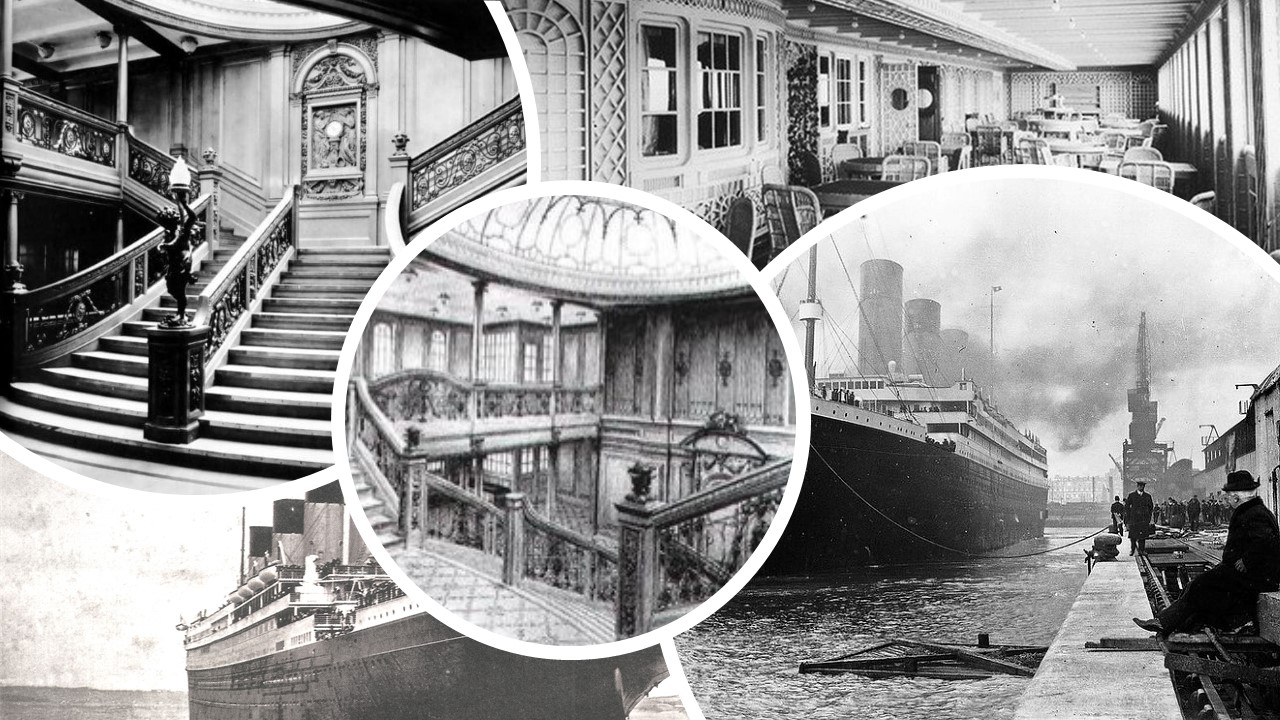